In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker
from matplotlib.ticker import FuncFormatter

In [111]:
file_path = '/content/drive/MyDrive/Thuctap/Thong_ke/Datalake-GMV.csv'
df = pd.read_csv(file_path)

#Turn off scientific notation during printing
pd.set_option('display.float_format', '{:.2f}'.format)
# pd.set_option('display.float_format', lambda x: '%.f' % x if x == int(x) else '%.2f' % x)
df.head(5)

,CUSTOMERID,SITEID,MONTH,YEAR,PAYMENTTYPE,PAYMENTNAME,GMV
0,NAMBO,NB02,10,2022,CASH,Tiền mặt,34816675600.00
1,NAMBO,NB02,1,2024,CASH,Tiền mặt,34645289250.00
2,NAMBO,NB02,1,2023,CASH,Tiền mặt,33385224500.00
3,NAMBO,NB02,12,2022,CASH,Tiền mặt,32805749450.00
4,NAMBO,NB02,7,2022,CASH,Tiền mặt,31106646850.00


Chú thích
- GMV: Gross Merchandise Value

In [112]:
# To distinguish between USD and VND values in the GMV column,
# we will check for keywords in the PAYMENTTYPE or PAYMENTNAME columns related to USD or VND.
# Filtering the data to check which rows are likely in USD or VND based on PAYMENTTYPE or PAYMENTNAME
usd_data = df[df['PAYMENTTYPE'].str.contains("USD", case=False, na=False)]
khr_data = df[df['PAYMENTTYPE'].str.contains("KHR", case=False, na=False)]
vnd_data = df[~df['PAYMENTTYPE'].str.contains("USD", case=False, na=False)]

exchange_rate_khr = 5600    # 1 KHR = 5,600 VND
exchange_rate_usd = 24000  # 1 USD = 24,000 VND

# Convert GMV values ​​in USD,KHR group to VND
usd_data['GMV'] = usd_data['GMV'] * exchange_rate_usd
khr_data['GMV'] = khr_data['GMV'] * exchange_rate_khr
# Merge the converted data with the original rows in VND.
df_1 = pd.concat([usd_data, khr_data,vnd_data])

<ipython-input-112-504e2c95c1de>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usd_data['GMV'] = usd_data['GMV'] * exchange_rate_usd
<ipython-input-112-504e2c95c1de>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  khr_data['GMV'] = khr_data['GMV'] * exchange_rate_khr


In [113]:
df_1
khr_data_ = df_1[df_1['PAYMENTTYPE'].str.contains("KHR", case=False, na=False)]
khr_data_

,CUSTOMERID,SITEID,MONTH,YEAR,PAYMENTTYPE,PAYMENTNAME,GMV
97828,MAISONCAM,45K1,1,2023,CASH_KHR,CASH (KHR),2918720.00
97921,MAISONCAM,45K1,7,2023,CASH_KHR,CASH (KHR),1613472.00
97940,MAISONCAM,75K3,6,2024,CASH_KHR,CASH (KHR),1413664.00
97951,MAISONCAM,45K1,4,2023,CASH_KHR,CASH (KHR),1294720.00
97958,MAISONCAM,45K1,4,2023,OTHER_KHR,OTHER (KHR),1256416.00
98030,MAISONCAM,75K3,7,2024,CASH_KHR,CASH (KHR),782824.00
98064,MAISONCAM,75K4,4,2024,CASH_KHR,CASH (KHR),648480.00
98087,MAISONCAM,75K3,12,2023,CASH_KHR,CASH (KHR),533120.00
98096,MAISONCAM,75K3,3,2024,CASH_KHR,CASH (KHR),464800.00
98129,MAISONCAM,60K2,10,2023,CASH_KHR,CASH (KHR),364000.00


#Number of CUSTOMERID from 2020 to 2024


In [114]:
#Group by month and year, counting customers
year_ = df_1[(df_1['YEAR'] > 2019) & (df_1['YEAR'] < 2026)]
grouped_unique_customers = year_.groupby(['MONTH', 'YEAR'])['CUSTOMERID'].nunique().reset_index(name='CUSTOMER_QUANTITY')
grouped_customers = grouped_unique_customers.sort_values(by= ['YEAR','MONTH']).reset_index(drop=True)

grouped_customers

,MONTH,YEAR,CUSTOMER_QUANTITY
0,1,2020,69
1,2,2020,69
2,3,2020,72
3,4,2020,66
4,5,2020,71
5,6,2020,76
6,7,2020,78
7,8,2020,83
8,9,2020,83
9,10,2020,89


#Count the number of stores each CUSTOMERID has opened.

In [115]:
#Combining both conditions: Count unique stores per customer and over time (by month and year)
stores_per_customer_over_time = df_1.groupby(['CUSTOMERID', 'MONTH', 'YEAR'])['SITEID'].nunique().reset_index()
stores_per_customer_over_time = stores_per_customer_over_time.rename(columns={'SITEID': 'DISTINCT_STORE_COUNT'})
stores_per_customer_over_time

,CUSTOMERID,MONTH,YEAR,DISTINCT_STORE_COUNT
0,4GSTEXAS,1,2024,1
1,4GSTEXAS,2,2024,1
2,4GSTEXAS,3,2024,5
3,4GSTEXAS,4,2022,1
4,4GSTEXAS,5,2021,3
...,...,...,...,...
7731,YOUTHMARKET,7,2024,2
7732,YOUTHMARKET,8,2024,3
7733,YOUTHMARKET,9,2024,3
7734,YOUTHMARKET,10,2024,3


In [116]:
# Nhóm theo cột 'MONTH' và 'YEAR', sau đó tính tổng cột 'Unique_Store_Count'
monthly_store_sum = stores_per_customer_over_time.groupby(['YEAR', 'MONTH'])['DISTINCT_STORE_COUNT'].sum().reset_index()
monthly_store_sum

,YEAR,MONTH,DISTINCT_STORE_COUNT
0,2015,8,1
1,2016,3,2
2,2016,4,3
3,2016,5,3
4,2016,6,3
...,...,...,...
104,2024,10,559
105,2027,1,1
106,2032,3,1
107,2032,9,1


#GMV by 4 Payment Methods
- Cash Payment
- QR Code Payment
- Visa/Master Payment
- Other Payment

In [117]:
year_ = df_1[(df_1['YEAR'] > 2019) & (df_1['YEAR'] < 2025)]
# Grouping by YEAR and MONTH, and calculating the total GMV
df_grouped_GMV = year_.groupby(['YEAR', 'MONTH'])['GMV'].sum().reset_index(name='tongGMV')
df_grouped_GMV

,YEAR,MONTH,tongGMV
0,2020,1,240284180410.00
1,2020,2,189936257800.00
2,2020,3,154870241247.00
3,2020,4,77470131131.00
4,2020,5,187146383064.00
5,2020,6,211260651766.00
6,2020,7,233423021730.00
7,2020,8,183990208373.00
8,2020,9,219252452940.67
9,2020,10,252736751137.00


In [118]:
# List all unique values from the 'PAYMENTTYPE' column to identify the payment methods in the dataset
payment_methods = df_1['PAYMENTTYPE'].unique()

# Display the unique payment methods
payment_methods

array(['CASH_USD', 'VNP_USD', 'ABAKHQR_USD', 'CREDITCARD_USD',
       'ABAQR_USD', 'ACLEDAQR_USD', 'OTHER_USD', 'ACLEDAKHQR_USD',
       'VOUCHER_USD', 'ABAWeChat_USD', 'ABAAlipay_USD', 'CASH_KHR',
       'OTHER_KHR', 'CREDITCARD_KHR', 'CASH', 'DEBIT', 'CREDIT', 'BIDV75',
       'BIDV45', 'FOODY', 'ATM', 'TC', 'TRANS', 'EXIM49', 'VISA',
       'EXIM47', 'MASTER', 'SACOMBANK4849', 'EXIM3839', 'TIEPKHACH',
       'DEPOSIT', 'VIP', 'GRAB', 'TVISA', 'GOJEK', 'CARD', 'CT5200',
       'VNPAY', 'PAYOOCT', 'CT5379', 'Grab', 'PayMECards', 'BAEMIN',
       'CARD-001', 'LOSHIP', 'PAYOO', 'ZALOPAY', 'NOWFOODY', 'HDBANK',
       'MOCA', 'CT5353', 'OTHER', 'TM', 'MOMO', 'GOFOOD', 'CK', 'VietQR',
       'THU HỘ', 'QRP', 'DEBT', 'CODDHL', 'CKHDB', 'PAID', 'Now',
       'BEFOOD', 'CT3687', 'MOMOOFFLINE', 'BANKTRANFERSHINHAN', 'RETURN',
       'ZALOPAY1', 'TCBCards', 'CKO', 'TS', 'MM', 'CREDITCARDVCB',
       'GRABFOOD', 'Gojek', 'Baemin', 'NOW', 'PAYPAL', 'PayMEQRcode',
       'CATHE4749', 'FOC', 'EXIM

QR Code Payment

In [119]:
payment_QR = [
    'VietQR', 'VNPayQR', 'VNPAYQR', 'CK2', 'CKACB', 'CKHDB', 'CKO', 'CK',
    'CK1', 'QR', 'QRP', 'VNPAY-QR', 'PAYOOQR', 'SmartPay', 'SMARTPAYQR',
    'INFOCMSQR', 'PayMEQRcode', 'ABAQR_USD', 'ACLEDAQR_USD', 'ACLEDAKHQR_USD','ABAKHQR_USD','MOMO_SCANNER_V2'
]
payment_QR

['VietQR',
 'VNPayQR',
 'VNPAYQR',
 'CK2',
 'CKACB',
 'CKHDB',
 'CKO',
 'CK',
 'CK1',
 'QR',
 'QRP',
 'VNPAY-QR',
 'PAYOOQR',
 'SmartPay',
 'SMARTPAYQR',
 'INFOCMSQR',
 'PayMEQRcode',
 'ABAQR_USD',
 'ACLEDAQR_USD',
 'ACLEDAKHQR_USD',
 'ABAKHQR_USD',
 'MOMO_SCANNER_V2']

In [120]:
# Filter the dataset to include only rows where PAYMENTTYPE is in the payment_QR list
df_payment_QR = year_[year_['PAYMENTTYPE'].isin(payment_QR)]

# Group the filtered data by year (NAM) and month (THANG), summing the GMV values
df_grouped_payment_QR = df_payment_QR.groupby(['YEAR', 'MONTH'])['GMV'].sum().reset_index(name='GMV_QRpayment')

df_grouped_payment_QR

,YEAR,MONTH,GMV_QRpayment
0,2020,1,207722672.00
1,2020,2,280235457.00
2,2020,3,288962326.00
3,2020,4,213786210.00
4,2020,5,260743960.00
5,2020,6,219901550.00
6,2020,7,231873420.00
7,2020,8,213671890.00
8,2020,9,140713675.00
9,2020,10,173624420.00


In [121]:
payment_methods_2 = [method for method in payment_methods if method not in payment_QR]

# Display the result
payment_methods_2

['CASH_USD',
 'VNP_USD',
 'CREDITCARD_USD',
 'OTHER_USD',
 'VOUCHER_USD',
 'ABAWeChat_USD',
 'ABAAlipay_USD',
 'CASH_KHR',
 'OTHER_KHR',
 'CREDITCARD_KHR',
 'CASH',
 'DEBIT',
 'CREDIT',
 'BIDV75',
 'BIDV45',
 'FOODY',
 'ATM',
 'TC',
 'TRANS',
 'EXIM49',
 'VISA',
 'EXIM47',
 'MASTER',
 'SACOMBANK4849',
 'EXIM3839',
 'TIEPKHACH',
 'DEPOSIT',
 'VIP',
 'GRAB',
 'TVISA',
 'GOJEK',
 'CARD',
 'CT5200',
 'VNPAY',
 'PAYOOCT',
 'CT5379',
 'Grab',
 'PayMECards',
 'BAEMIN',
 'CARD-001',
 'LOSHIP',
 'PAYOO',
 'ZALOPAY',
 'NOWFOODY',
 'HDBANK',
 'MOCA',
 'CT5353',
 'OTHER',
 'TM',
 'MOMO',
 'GOFOOD',
 'THU HỘ',
 'DEBT',
 'CODDHL',
 'PAID',
 'Now',
 'BEFOOD',
 'CT3687',
 'MOMOOFFLINE',
 'BANKTRANFERSHINHAN',
 'RETURN',
 'ZALOPAY1',
 'TCBCards',
 'TS',
 'MM',
 'CREDITCARDVCB',
 'GRABFOOD',
 'Gojek',
 'Baemin',
 'NOW',
 'PAYPAL',
 'CATHE4749',
 'FOC',
 'EXIM45',
 'GRABPAY',
 'FCASH',
 'AMEX',
 'COD',
 'PHONG',
 'BE',
 'DEBIT1',
 'POINT',
 'ZLPAY',
 'AIRPAY',
 'UTOP',
 'GHN',
 'VNPAYOF',
 'TTVNPAY',
 'C

Visa/Master Payment

In [122]:
payment_Visa_Master = ['VISA','TVISA','SMARTPAYCARD','MASTER','ATM','CT','CREDIT','CREDITCARDVCB','CREDITCARDBIDV'
                        ,'CREDITCARD_USD','DEBIT','CREDITCARD_KHR','DEBIT1','CARD-001'
                        ]
payment_Visa_Master

['VISA',
 'TVISA',
 'SMARTPAYCARD',
 'MASTER',
 'ATM',
 'CT',
 'CREDIT',
 'CREDITCARDVCB',
 'CREDITCARDBIDV',
 'CREDITCARD_USD',
 'DEBIT',
 'CREDITCARD_KHR',
 'DEBIT1',
 'CARD-001']

In [123]:
# Filter the dataset to include only rows where PAYMENTTYPE is in the payment_QR list
df_payment_Visa_Master = year_[year_['PAYMENTTYPE'].isin(payment_Visa_Master)]

# Group the filtered data by year (NAM) and month (THANG), summing the GMV values
df_grouped_payment_Visa_Master = df_payment_Visa_Master.groupby(['YEAR', 'MONTH'])['GMV'].sum().reset_index(name='GMV_Payment_Visa_Master')

df_grouped_payment_Visa_Master

,YEAR,MONTH,GMV_Payment_Visa_Master
0,2020,1,62357216032.00
1,2020,2,48012051732.00
2,2020,3,49397211347.00
3,2020,4,34919128173.00
4,2020,5,45480854726.00
5,2020,6,53149222410.00
6,2020,7,54906963013.00
7,2020,8,49137580544.00
8,2020,9,57827276037.00
9,2020,10,66003148153.00


In [124]:
payment_methods_3 = [method for method in payment_methods_2 if method not in payment_Visa_Master]

# Display the result
payment_methods_3

['CASH_USD',
 'VNP_USD',
 'OTHER_USD',
 'VOUCHER_USD',
 'ABAWeChat_USD',
 'ABAAlipay_USD',
 'CASH_KHR',
 'OTHER_KHR',
 'CASH',
 'BIDV75',
 'BIDV45',
 'FOODY',
 'TC',
 'TRANS',
 'EXIM49',
 'EXIM47',
 'SACOMBANK4849',
 'EXIM3839',
 'TIEPKHACH',
 'DEPOSIT',
 'VIP',
 'GRAB',
 'GOJEK',
 'CARD',
 'CT5200',
 'VNPAY',
 'PAYOOCT',
 'CT5379',
 'Grab',
 'PayMECards',
 'BAEMIN',
 'LOSHIP',
 'PAYOO',
 'ZALOPAY',
 'NOWFOODY',
 'HDBANK',
 'MOCA',
 'CT5353',
 'OTHER',
 'TM',
 'MOMO',
 'GOFOOD',
 'THU HỘ',
 'DEBT',
 'CODDHL',
 'PAID',
 'Now',
 'BEFOOD',
 'CT3687',
 'MOMOOFFLINE',
 'BANKTRANFERSHINHAN',
 'RETURN',
 'ZALOPAY1',
 'TCBCards',
 'TS',
 'MM',
 'GRABFOOD',
 'Gojek',
 'Baemin',
 'NOW',
 'PAYPAL',
 'CATHE4749',
 'FOC',
 'EXIM45',
 'GRABPAY',
 'FCASH',
 'AMEX',
 'COD',
 'PHONG',
 'BE',
 'POINT',
 'ZLPAY',
 'AIRPAY',
 'UTOP',
 'GHN',
 'VNPAYOF',
 'TTVNPAY',
 'NOPHONG',
 'momo',
 'VOUCHER',
 'SHOPPE',
 'Momo',
 'JCB',
 'BEAMIN',
 'COUPON',
 'VNP',
 'REFUND',
 'Be',
 'CONNECT24',
 'debt',
 'TMO',
 '

Cash Payment

In [125]:
payment_cash = ['CASH (KHR)','CASH','CASH_USD','CASH VND','TMO','CASH-001']
payment_cash

['CASH (KHR)', 'CASH', 'CASH_USD', 'CASH VND', 'TMO', 'CASH-001']

In [126]:
# Filter the dataset to include only rows where PAYMENTTYPE is in the payment_QR list
df_payment_cash = year_[year_['PAYMENTTYPE'].isin(payment_cash)]

# Group the filtered data by year (NAM) and month (THANG), summing the GMV values
df_grouped_payment_cash = df_payment_cash.groupby(['YEAR', 'MONTH'])['GMV'].sum().reset_index(name='GMV_payment_cash')

df_grouped_payment_cash

,YEAR,MONTH,GMV_payment_cash
0,2020,1,169019581698.00
1,2020,2,136243985541.00
2,2020,3,101648265354.00
3,2020,4,40266525049.00
4,2020,5,122097493906.00
5,2020,6,135305094820.00
6,2020,7,151577373446.00
7,2020,8,110943874944.00
8,2020,9,132718232545.00
9,2020,10,154902973823.00


In [127]:
payment_methods_4 = [method for method in payment_methods_3 if method not in payment_cash]

# Display the result
payment_methods_4

['VNP_USD',
 'OTHER_USD',
 'VOUCHER_USD',
 'ABAWeChat_USD',
 'ABAAlipay_USD',
 'CASH_KHR',
 'OTHER_KHR',
 'BIDV75',
 'BIDV45',
 'FOODY',
 'TC',
 'TRANS',
 'EXIM49',
 'EXIM47',
 'SACOMBANK4849',
 'EXIM3839',
 'TIEPKHACH',
 'DEPOSIT',
 'VIP',
 'GRAB',
 'GOJEK',
 'CARD',
 'CT5200',
 'VNPAY',
 'PAYOOCT',
 'CT5379',
 'Grab',
 'PayMECards',
 'BAEMIN',
 'LOSHIP',
 'PAYOO',
 'ZALOPAY',
 'NOWFOODY',
 'HDBANK',
 'MOCA',
 'CT5353',
 'OTHER',
 'TM',
 'MOMO',
 'GOFOOD',
 'THU HỘ',
 'DEBT',
 'CODDHL',
 'PAID',
 'Now',
 'BEFOOD',
 'CT3687',
 'MOMOOFFLINE',
 'BANKTRANFERSHINHAN',
 'RETURN',
 'ZALOPAY1',
 'TCBCards',
 'TS',
 'MM',
 'GRABFOOD',
 'Gojek',
 'Baemin',
 'NOW',
 'PAYPAL',
 'CATHE4749',
 'FOC',
 'EXIM45',
 'GRABPAY',
 'FCASH',
 'AMEX',
 'COD',
 'PHONG',
 'BE',
 'POINT',
 'ZLPAY',
 'AIRPAY',
 'UTOP',
 'GHN',
 'VNPAYOF',
 'TTVNPAY',
 'NOPHONG',
 'momo',
 'VOUCHER',
 'SHOPPE',
 'Momo',
 'JCB',
 'BEAMIN',
 'COUPON',
 'VNP',
 'REFUND',
 'Be',
 'CONNECT24',
 'debt',
 'MN',
 'RECEP',
 'APPS-002',
 '

Other Payment

In [128]:
# Filter the dataset to include only rows where PAYMENTTYPE is in the payment_QR list
df_payment_Other = year_[year_['PAYMENTTYPE'].isin(payment_methods_4)]

# Group the filtered data by year (NAM) and month (THANG), summing the GMV values
df_grouped_payment_other = df_payment_Other.groupby(['YEAR', 'MONTH'])['GMV'].sum().reset_index(name='GMV_payment_other')

df_grouped_payment_other

,YEAR,MONTH,GMV_payment_other
0,2020,1,8699660008.00
1,2020,2,5399985070.00
2,2020,3,3535802220.00
3,2020,4,2070691699.00
4,2020,5,19307290472.00
5,2020,6,22586432986.00
6,2020,7,26706811851.00
7,2020,8,23695080995.00
8,2020,9,28566230683.67
9,2020,10,31657004741.00


# Visualization Chart

## GMV Trend by Year






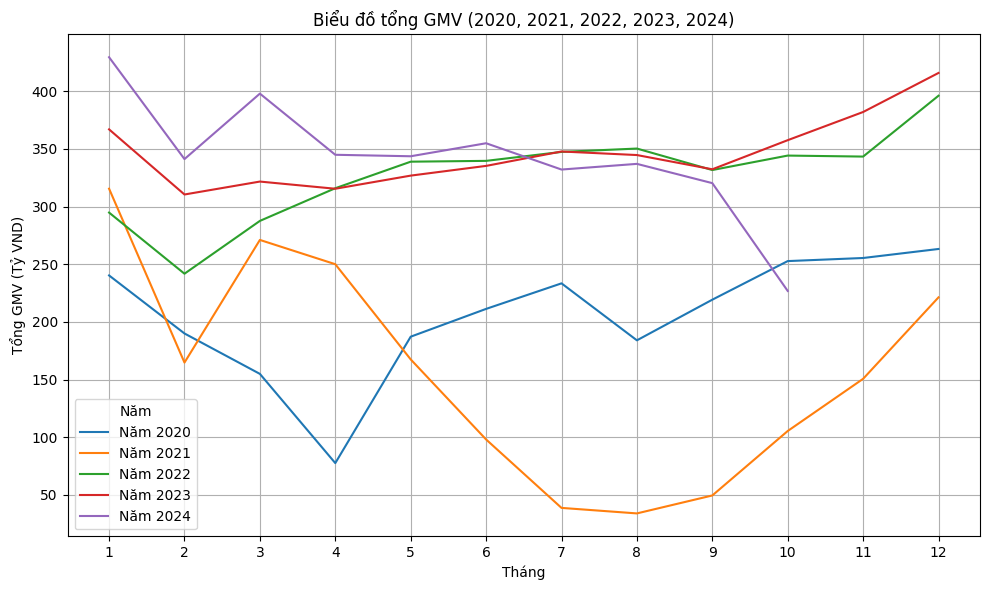

In [129]:

# Pivot the data so that each year has its own line, with months as columns
df_pivot = df_grouped_GMV.pivot(index='MONTH', columns='YEAR', values='tongGMV')
# Plotting the line chart again with y-axis adjustments for displaying values in thousands
plt.figure(figsize=(10, 6))
for year in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[year], label=f'Năm {year}')

# Adjusting the y-axis to display values in thousands with a custom formatter
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1e9):,}'))

plt.xticks(ticks=range(1, 13), labels=[str(i) for i in range(1, 13)])
# Adding labels and title
plt.xlabel('Tháng')
plt.ylabel('Tổng GMV (Tỷ VND)')
plt.title('Biểu đồ tổng GMV (2020, 2021, 2022, 2023, 2024)')
plt.legend(title='Năm')
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


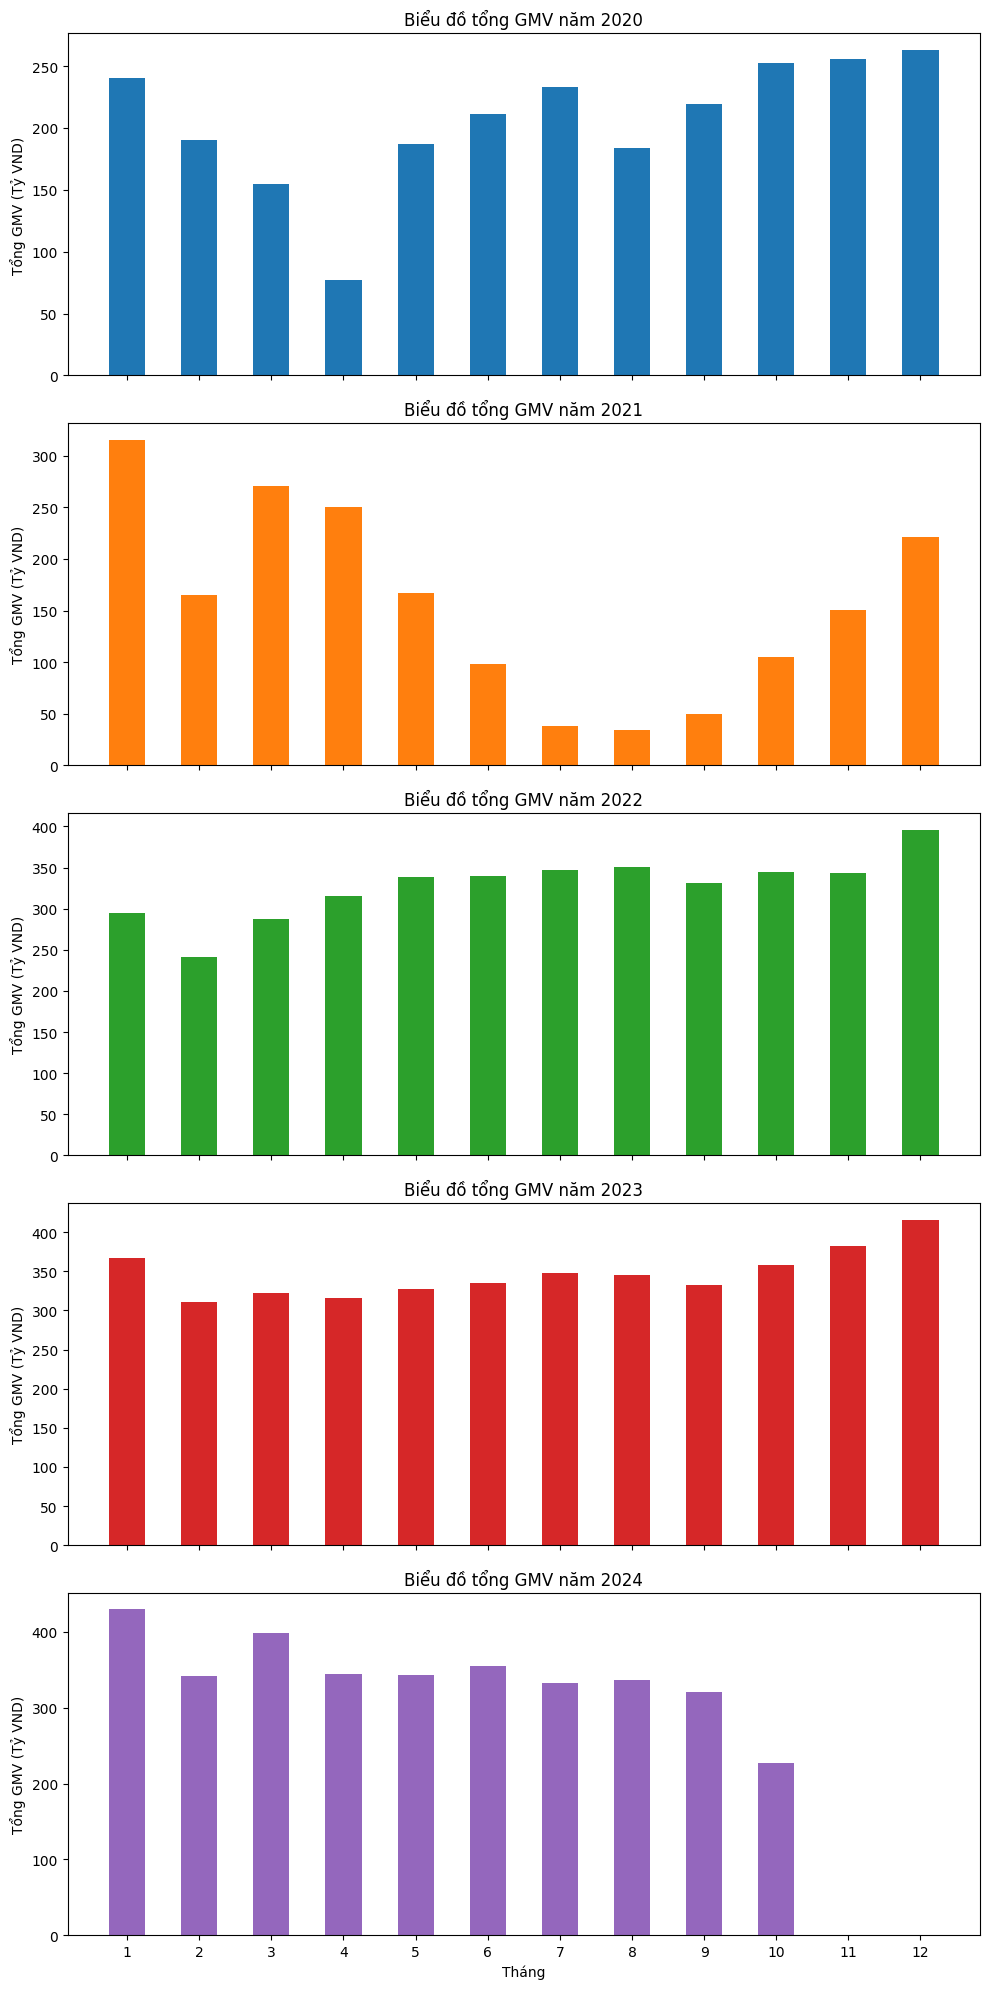

In [130]:

df_grouped_GMV = year_.groupby(['YEAR', 'MONTH'])['GMV'].sum().reset_index(name='tongGMV')
df_grouped_GMV = df_grouped_GMV.fillna(0)
# Create the pivot table for plotting
df_pivot = df_grouped_GMV.pivot(index='MONTH', columns='YEAR', values='tongGMV')
# Now, let's create the subplots without the grid lines
fig, axes = plt.subplots(nrows=len(df_pivot.columns), ncols=1, figsize=(10, 20), sharex=True)
# Plotting individual bar charts for each year
for i, (year, ax) in enumerate(zip(df_pivot.columns, axes)):
    ax.bar(df_pivot.index, df_pivot[year], width=0.5, label=f'Năm {year}', color=f'C{i}')
    ax.set_ylabel('Tổng GMV (Tỷ VND)')
    ax.set_title(f'Biểu đồ tổng GMV năm {year}')
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1e9):,}'))
# Common x-axis label for all subplots
plt.xticks(ticks=range(1, 13), labels=[str(i) for i in range(1, 13)])
plt.xlabel('Tháng')
plt.tight_layout()
# Remove grid lines from the chart
for ax in axes:
    ax.grid(False)  # Turn off the grid for each subplot
# Show the final plot
plt.show()


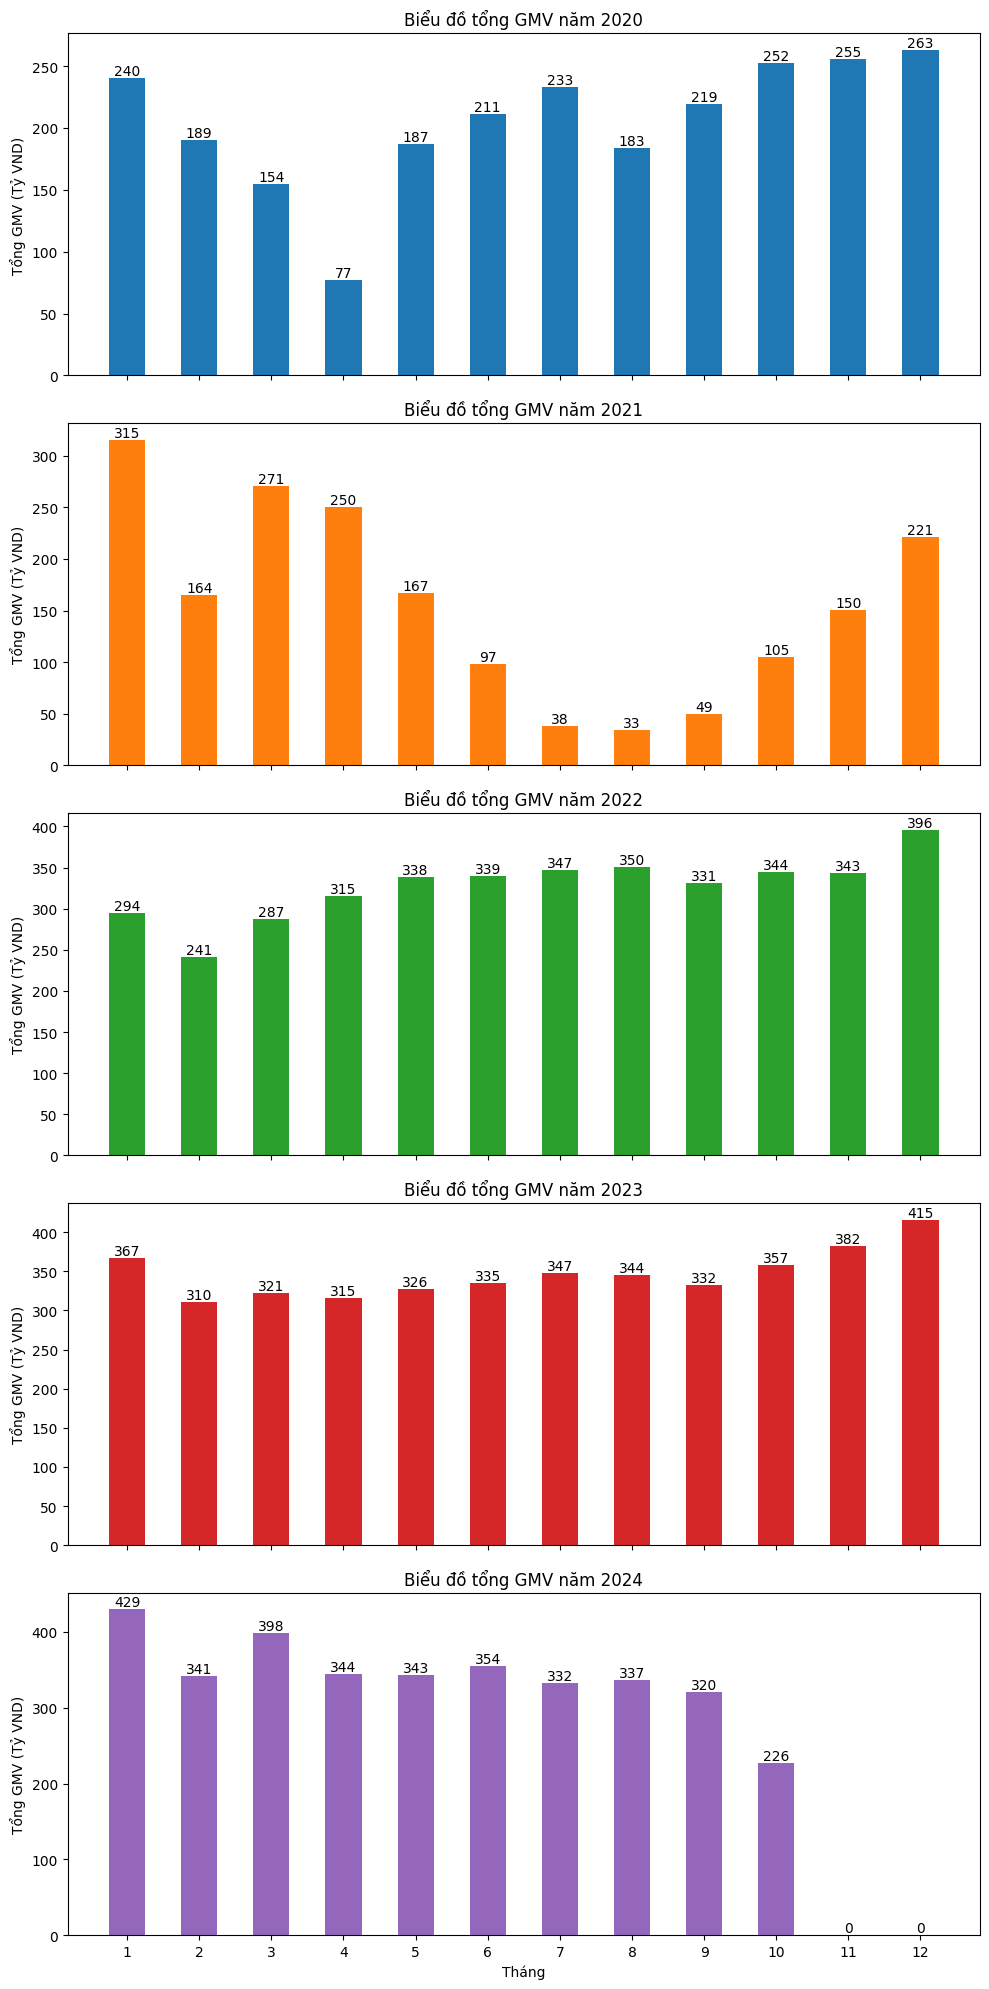

In [131]:
df_pivot = df_pivot.fillna(0)
# Create the subplots without the grid lines and add value labels on top of bars
fig, axes = plt.subplots(nrows=len(df_pivot.columns), ncols=1, figsize=(10, 20), sharex=True)
# Plotting individual bar charts for each year
for i, (year, ax) in enumerate(zip(df_pivot.columns, axes)):
    bars = ax.bar(df_pivot.index, df_pivot[year], width=0.5, label=f'Năm {year}', color=f'C{i}')
    # Adding text labels on top of the bars
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval/1e9):,}', ha='center', va='bottom')

    ax.set_ylabel('Tổng GMV (Tỷ VND)')
    ax.set_title(f'Biểu đồ tổng GMV năm {year}')
    # ax.xticks(ticks=range(1, 13), labels=[str(i) for i in range(1, 13)])
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1e9):,}'))
# Common x-axis label for all subplots
plt.xlabel('Tháng')
plt.xticks(ticks=range(1, 13), labels=[str(i) for i in range(1, 13)])
# Adjust layout to prevent overlap
plt.tight_layout()
# Remove grid lines from the chart
for ax in axes:
    ax.grid(False)  # Turn off the grid for each subplot
# Show the final plot
plt.show()

##GMV Distribution by Year

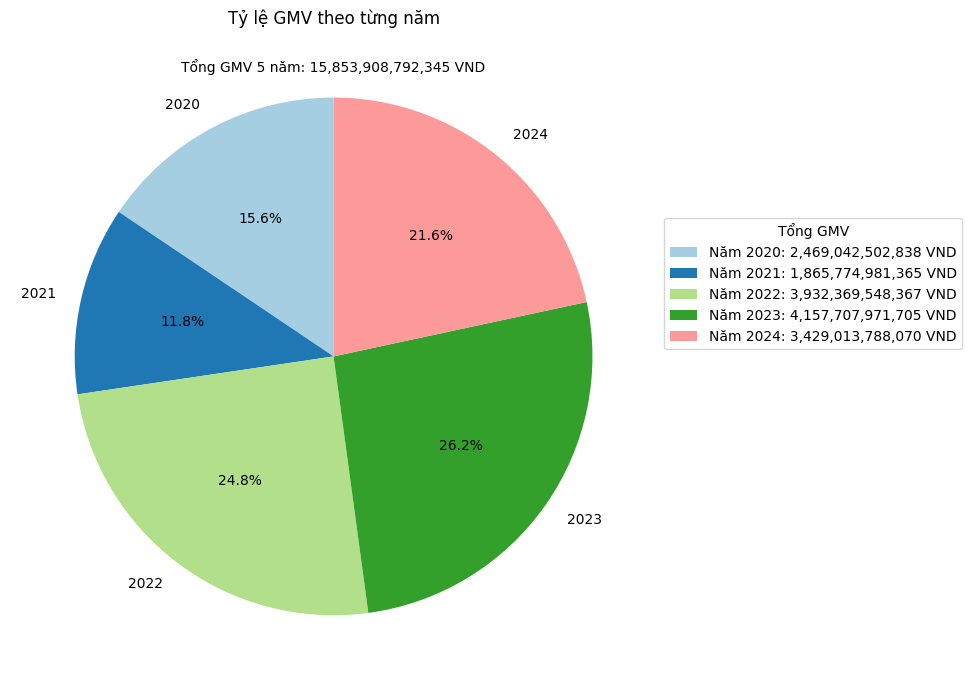

In [132]:
# Calculate total GMV for each year
df_total_GMV = df_grouped_GMV.groupby('YEAR')['tongGMV'].sum().reset_index()

# Data to draw pie chart
years = df_total_GMV['YEAR']
total_GMV = df_total_GMV['tongGMV']

# Calculate the total GMV of 5 years
total_gmv_5_nam = total_GMV.sum()

fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(total_GMV, labels=years, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
# Header configuration
plt.title('Tỷ lệ GMV theo từng năm')
# Add the total GMV of 5 years right below the title
plt.text(0, 1.1, f'Tổng GMV 5 năm: {total_gmv_5_nam:,.0f} VND', ha='center', fontsize=10, color='black')
# Create a legend table outside the chart
labels = [f'Năm {year}: {gmv:,.0f} VND' for year, gmv in zip(years, total_GMV)]
ax.legend(wedges, labels, title="Tổng GMV", loc="lower left", bbox_to_anchor=(1, 0.5), fontsize=10)

plt.tight_layout()
plt.show()


##Customer Growth by Year

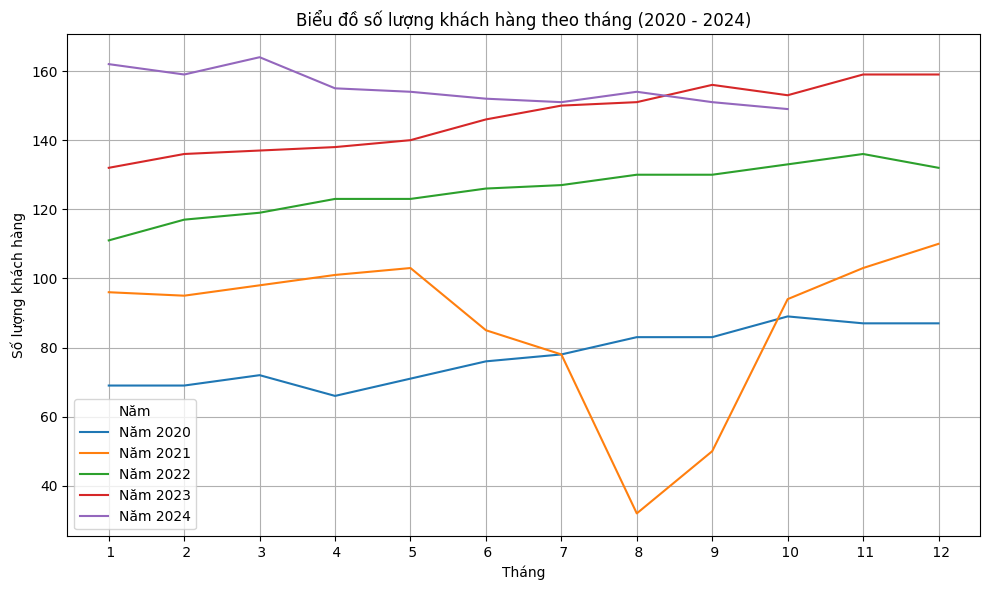

In [133]:
df_pivot = grouped_customers.pivot(index='MONTH', columns='YEAR', values='CUSTOMER_QUANTITY')

plt.figure(figsize=(10, 6))

# Draw each line for each year
for year in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[year], label=f'Năm {year}')

# Adjust y-axis to show actual customer value (not divided into millions)
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))  # Hiển thị trực tiếp số lượng khách hàng

plt.xticks(ticks=range(1, 13), labels=[f' {i}' for i in range(1, 13)])

plt.xlabel('Tháng')
plt.ylabel('Số lượng khách hàng')
plt.title('Biểu đồ số lượng khách hàng theo tháng (2020 - 2024)')

plt.legend(title='Năm')

plt.grid(True)

plt.tight_layout()
plt.show()


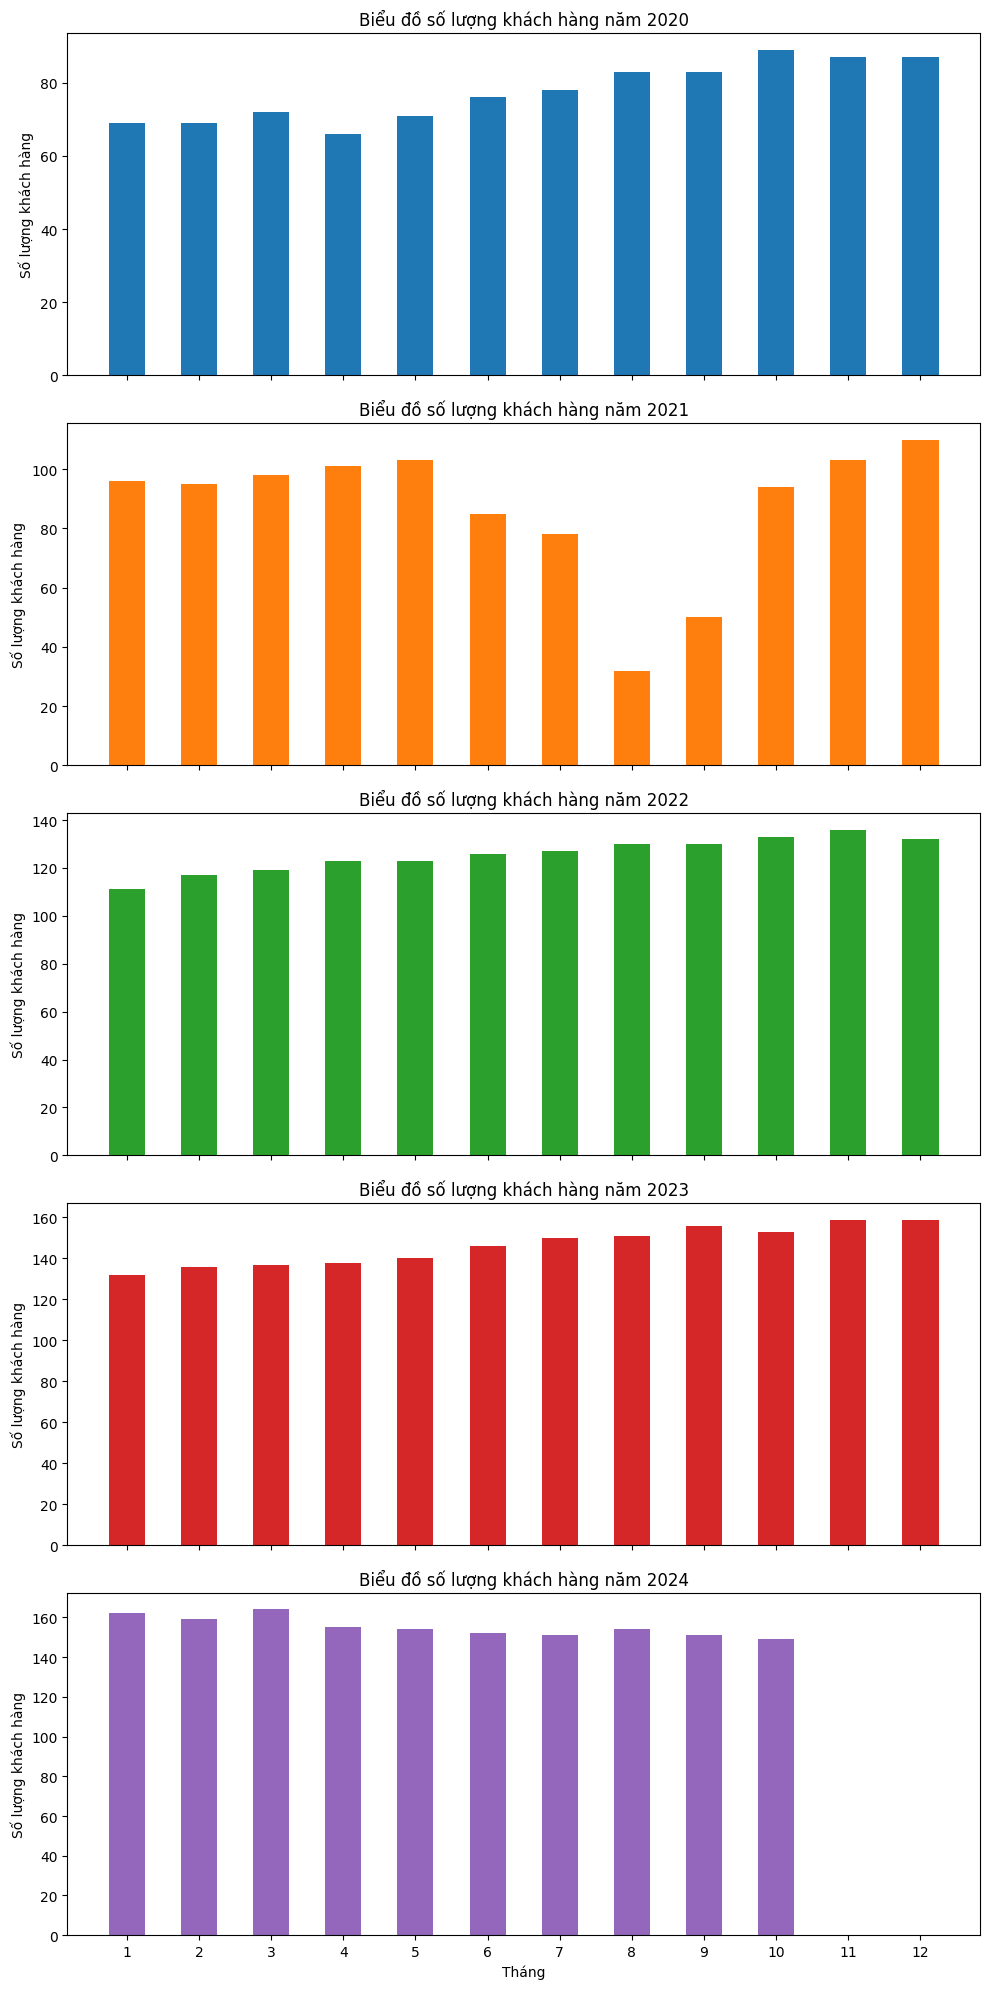

In [134]:
# Group data by year and month, calculate number of unique customers
df_grouped_cus = year_.groupby(['YEAR', 'MONTH'])['CUSTOMERID'].nunique().reset_index(name='tongCUSTOMERS')

# Handle missing values ​​(if any)
df_grouped_cus = df_grouped_cus.fillna(0)

# Create pivot table for chart
df_pivot = df_grouped_cus.pivot(index='MONTH', columns='YEAR', values='tongCUSTOMERS')

# Create subplots with row numbers corresponding to years
fig, axes = plt.subplots(nrows=len(df_pivot.columns), ncols=1, figsize=(10, 20), sharex=True)

# Draw a separate column chart for each year
for i, (year, ax) in enumerate(zip(df_pivot.columns, axes)):
    ax.bar(df_pivot.index, df_pivot[year], width=0.5, label=f'Năm {year}', color=f'C{i}')
    ax.set_ylabel('Số lượng khách hàng')
    ax.set_title(f'Biểu đồ số lượng khách hàng năm {year}')

    # Adjust the y axis to match the actual value
    ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.xlabel('Tháng')
plt.xticks(ticks=range(1, 13), labels=[str(i) for i in range(1, 13)])
plt.tight_layout()

for ax in axes:
    ax.grid(False)

plt.show()

##Store Expansion by Year

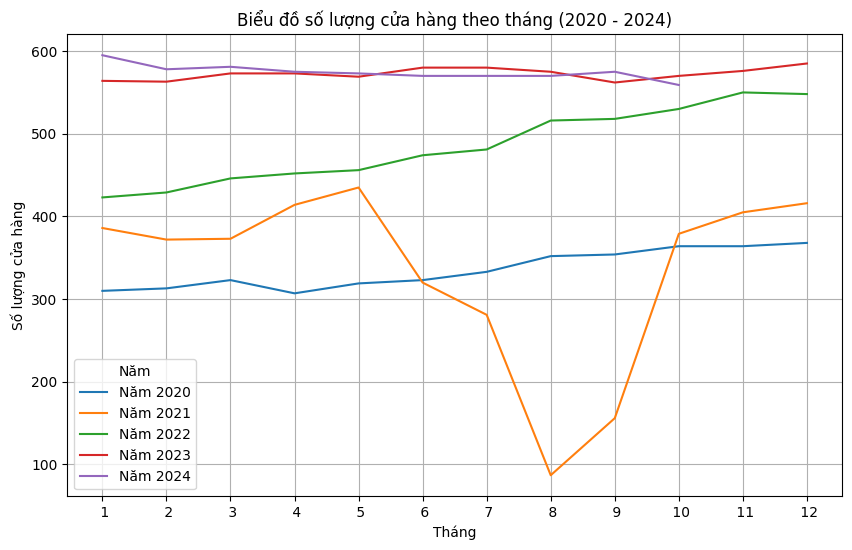

In [135]:

# Group by 'CUSTOMERID', 'MONTH', and 'YEAR', and count unique stores (SITEID)
stores_per_customer_over_time = df.groupby(['CUSTOMERID', 'MONTH', 'YEAR'])['SITEID'].nunique().reset_index()

# Rename the column to reflect that it's counting unique stores
stores_per_customer_over_time = stores_per_customer_over_time.rename(columns={'SITEID': 'Unique_Store_Count'})

# Now group by 'MONTH' and 'YEAR', and sum the unique store counts
monthly_store_sum = stores_per_customer_over_time.groupby(['YEAR', 'MONTH'])['Unique_Store_Count'].sum().reset_index()

# Filter the data to include only years 2020 to 2024 before plotting
filtered_monthly_store_sum = monthly_store_sum[(monthly_store_sum['YEAR'] >= 2020) & (monthly_store_sum['YEAR'] <= 2024)]

# Create a pivot table for easy plotting with filtered data
filtered_monthly_store_pivot = filtered_monthly_store_sum.pivot(index='MONTH', columns='YEAR', values='Unique_Store_Count')

# Plot the data for years 2020 to 2024
plt.figure(figsize=(10, 6))
for year in filtered_monthly_store_pivot.columns:
    plt.plot(filtered_monthly_store_pivot.index, filtered_monthly_store_pivot[year], label=f'Năm {year}')
plt.xticks(ticks=range(1, 13), labels=[f' {i}' for i in range(1, 13)])

plt.title('Biểu đồ số lượng cửa hàng theo tháng (2020 - 2024)')
plt.xlabel('Tháng')
plt.ylabel('Số lượng cửa hàng')
plt.legend(title='Năm')
plt.grid(True)
plt.show()

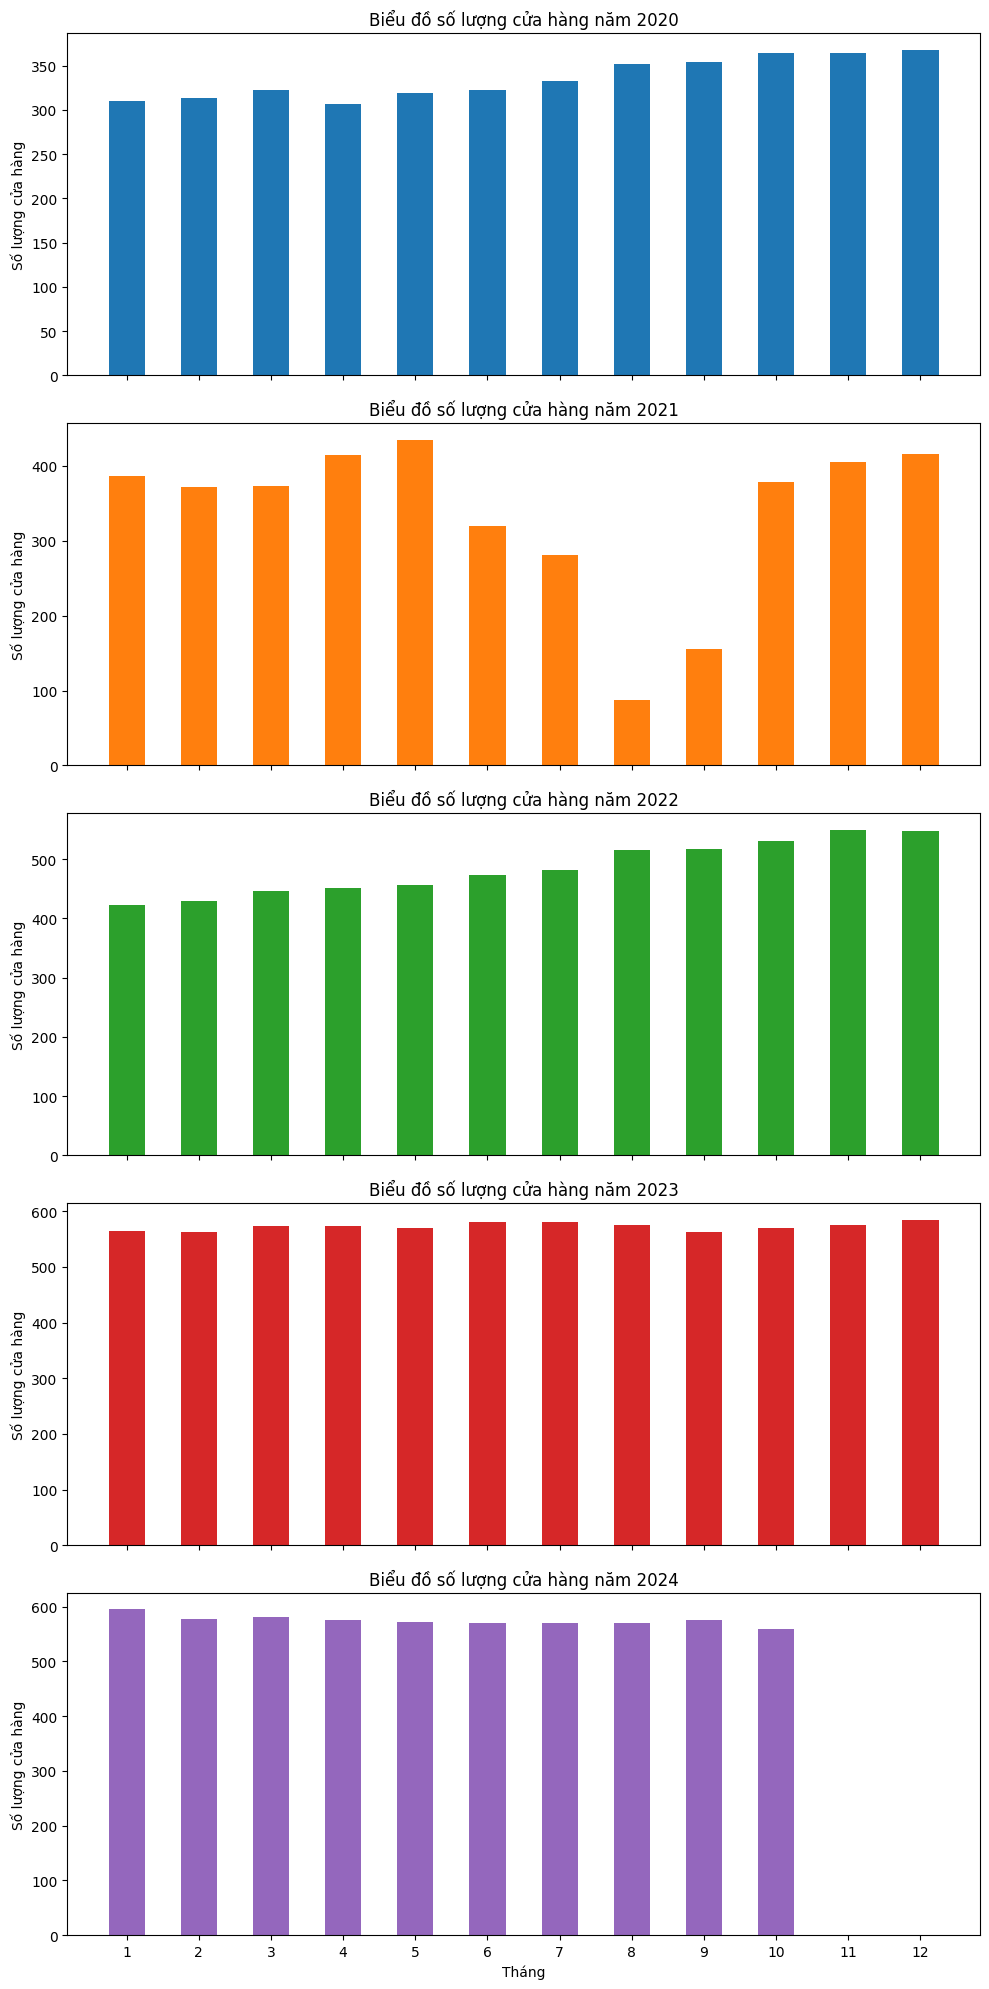

In [136]:
# Filter the data to include only the years 2020 to 2024
filtered_store_sum = monthly_store_sum[(monthly_store_sum['YEAR'] >= 2020) & (monthly_store_sum['YEAR'] <= 2024)]

# Pivot the filtered data for plotting
filtered_df_pivot = filtered_store_sum.pivot(index='MONTH', columns='YEAR', values='Unique_Store_Count')

# Create subplots for each year
fig, axes = plt.subplots(nrows=len(filtered_df_pivot.columns), ncols=1, figsize=(10, 20), sharex=True)

# Plot bar charts for each year
for i, (year, ax) in enumerate(zip(filtered_df_pivot.columns, axes)):
    ax.bar(filtered_df_pivot.index, filtered_df_pivot[year], width=0.5, label=f'Năm {year}', color=f'C{i}')
    ax.set_ylabel('Số lượng cửa hàng')
    ax.set_title(f'Biểu đồ số lượng cửa hàng năm {year}')

    # Format y-axis to show the actual value
    ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# Set x-axis label
plt.xlabel('Tháng')
plt.xticks(ticks=range(1, 13), labels=[str(i) for i in range(1, 13)])
plt.tight_layout()

# Turn off grid for each subplot
for ax in axes:
    ax.grid(False)

# Display the plot
plt.show()

##Monthly QR Code Payment Breakdown (2020-2024)

In [137]:
df_grouped_payment_cash
df_grouped_payment_Visa_Master
df_grouped_payment_QR
df_grouped_payment_other

,YEAR,MONTH,GMV_payment_other
0,2020,1,8699660008.00
1,2020,2,5399985070.00
2,2020,3,3535802220.00
3,2020,4,2070691699.00
4,2020,5,19307290472.00
5,2020,6,22586432986.00
6,2020,7,26706811851.00
7,2020,8,23695080995.00
8,2020,9,28566230683.67
9,2020,10,31657004741.00


In [138]:
#pd.options.display.float_format = '{:.2f}'.format
payment_QR_results = []
years = [2020, 2021, 2022, 2023, 2024]
# Loop through each year and filter the dataset, summing the GMV for QR payments
for year in years:
    df_year = df_1[df_1['YEAR'] == year]  # Filter for the current year
    df_payment_QR = df_year[df_year['PAYMENTTYPE'].isin(payment_QR)]  # Filter for QR payments
    df_grouped_QR = df_payment_QR.groupby(['YEAR', 'MONTH'])['GMV'].sum().reset_index(name='GMV_QRpayment')
    #df_grouped_QR['GMV_QRpayment'] = df_grouped_QR['GMV_QRpayment'].round(2)
    payment_QR_results.append(df_grouped_QR)  # Store the result for each year
# Display the results for all years (2020-2024)
payment_QR_results
# Lấy kết quả cho năm 2020 (index 0)
df_payment_QR_2020 = payment_QR_results[0]
df_payment_QR_2021 = payment_QR_results[1]
df_payment_QR_2022 = payment_QR_results[2]
df_payment_QR_2023 = payment_QR_results[3]
df_payment_QR_2024 = payment_QR_results[4]

In [139]:
df_payment_QR_2020

,YEAR,MONTH,GMV_QRpayment
0,2020,1,207722672.00
1,2020,2,280235457.00
2,2020,3,288962326.00
3,2020,4,213786210.00
4,2020,5,260743960.00
5,2020,6,219901550.00
6,2020,7,231873420.00
7,2020,8,213671890.00
8,2020,9,140713675.00
9,2020,10,173624420.00


In [140]:
payment_cash_results = []
years = [2020, 2021, 2022, 2023, 2024]
for year in years:
  df_year = df_1[df_1['YEAR'] == year]
  df_payment_cash = df_year[df_year['PAYMENTTYPE'].isin(payment_cash)]
  df_grouped_cash = df_payment_cash.groupby(['YEAR', 'MONTH'])['GMV'].sum().reset_index(name='GMV_payment_cash')
  payment_cash_results.append(df_grouped_cash)
payment_cash_results
df_payment_cash_2020 = payment_cash_results[0]
df_payment_cash_2021 = payment_cash_results[1]
df_payment_cash_2022 = payment_cash_results[2]
df_payment_cash_2023 = payment_cash_results[3]
df_payment_cash_2024 = payment_cash_results[4]

In [141]:
df_payment_cash_2020

,YEAR,MONTH,GMV_payment_cash
0,2020,1,169019581698.00
1,2020,2,136243985541.00
2,2020,3,101648265354.00
3,2020,4,40266525049.00
4,2020,5,122097493906.00
5,2020,6,135305094820.00
6,2020,7,151577373446.00
7,2020,8,110943874944.00
8,2020,9,132718232545.00
9,2020,10,154902973823.00


In [142]:
payment_visa_master_results = []
years = [2020, 2021, 2022, 2023, 2024]
for year in years:
  df_year = df_1[df_1['YEAR'] == year]
  df_payment_visa_master = df_year[df_year['PAYMENTTYPE'].isin(payment_Visa_Master)]
  df_grouped_visa_master = df_payment_visa_master.groupby(['YEAR', 'MONTH'])['GMV'].sum().reset_index(name='GMV_payment_visa_master')
  payment_visa_master_results.append(df_grouped_visa_master)
payment_visa_master_results
df_payment_visa_master_2020 = payment_visa_master_results[0]
df_payment_visa_master_2021 = payment_visa_master_results[1]
df_payment_visa_master_2022 = payment_visa_master_results[2]
df_payment_visa_master_2023 = payment_visa_master_results[3]
df_payment_visa_master_2024 = payment_visa_master_results[4]

In [143]:
df_payment_visa_master_2024

,YEAR,MONTH,GMV_payment_visa_master
0,2024,1,148076499016.00
1,2024,2,97192190795.00
2,2024,3,155099886740.00
3,2024,4,113683546148.00
4,2024,5,108666546283.00
5,2024,6,101660189001.00
6,2024,7,82621690707.00
7,2024,8,85629352152.00
8,2024,9,79815928618.00
9,2024,10,52171578668.00


In [144]:
payment_other_results = []
years = [2020, 2021, 2022, 2023, 2024]
for year in years:
  df_year = df_1[df_1['YEAR'] == year]
  df_payment_other = df_year[df_year['PAYMENTTYPE'].isin(payment_methods_4)]
  df_grouped_other = df_payment_other.groupby(['YEAR', 'MONTH'])['GMV'].sum().reset_index(name='GMV_payment_other')
  payment_other_results.append(df_grouped_other)
payment_other_results
df_payment_other_2020 = payment_other_results[0]
df_payment_other_2021 = payment_other_results[1]
df_payment_other_2022 = payment_other_results[2]
df_payment_other_2023 = payment_other_results[3]
df_payment_other_2024 = payment_other_results[4]

In [145]:
df_payment_other_2024

,YEAR,MONTH,GMV_payment_other
0,2024,1,76026132451.20
1,2024,2,55981279767.75
2,2024,3,69966707343.06
3,2024,4,69146384611.12
4,2024,5,74395922875.36
5,2024,6,83587151536.23
6,2024,7,79527624799.58
7,2024,8,82227316710.34
8,2024,9,79748953857.02
9,2024,10,57659958293.90


##GMV Payment 2020 Line Chart

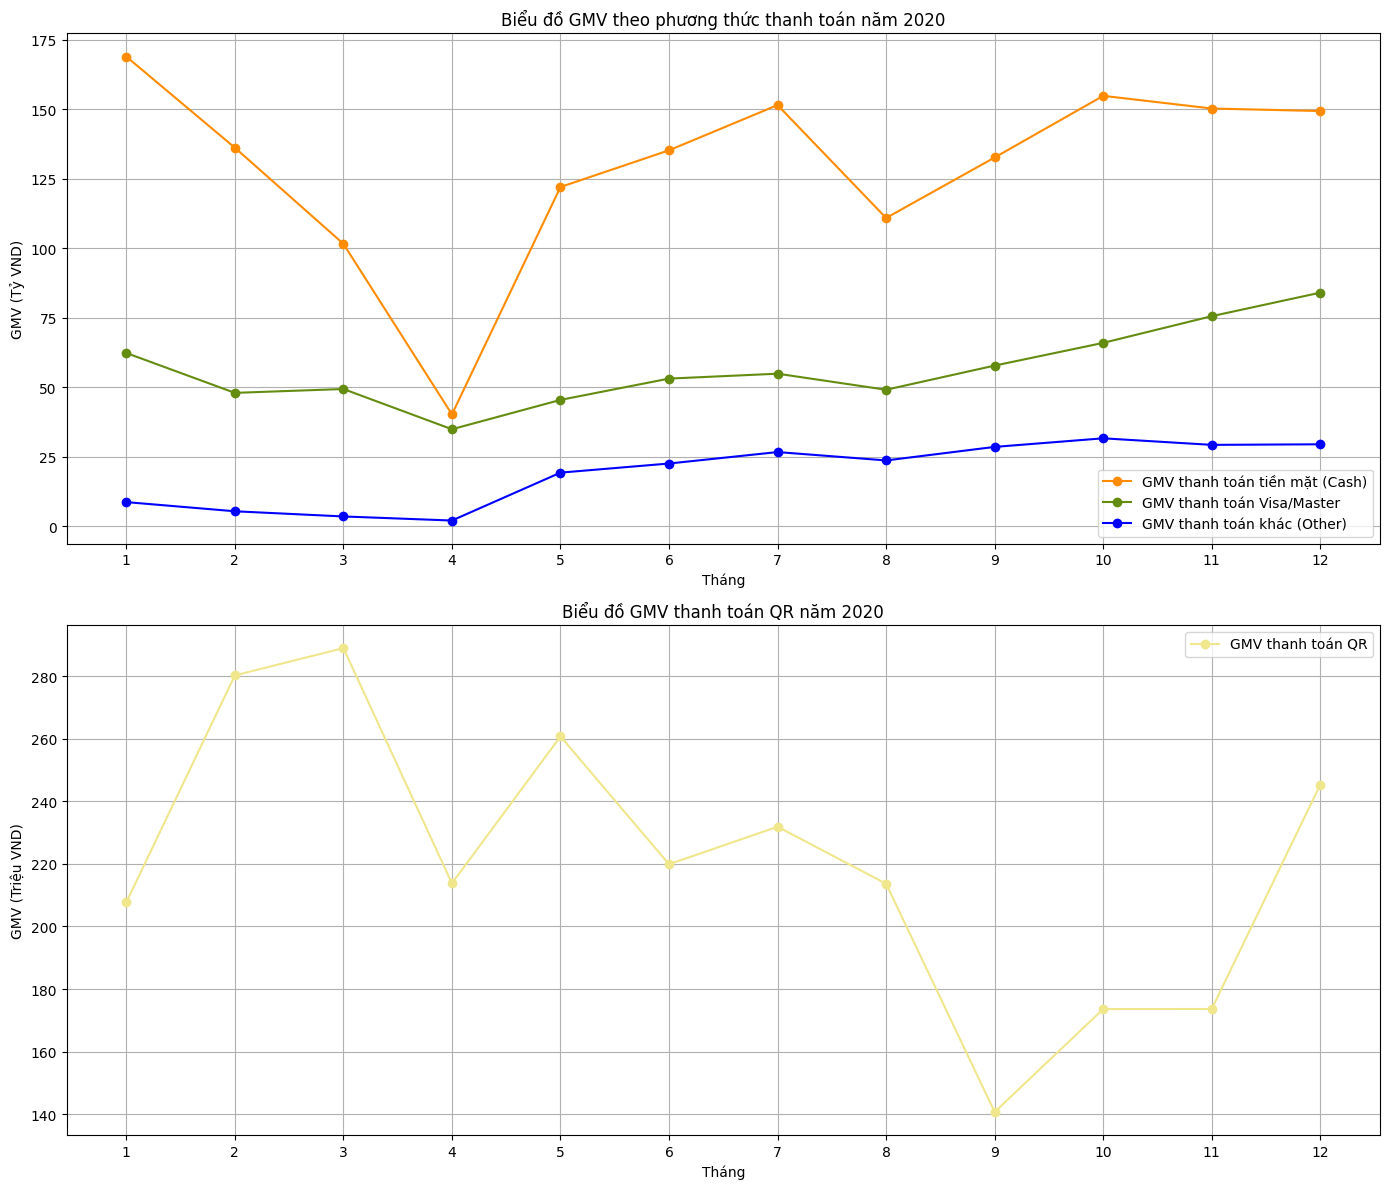

In [146]:
plt.figure(figsize=(14, 12))

months = np.arange(1, 13)

df_payment_cash_2020_ = df_payment_cash_2020['GMV_payment_cash'].values
df_payment_visa_master_2020_ = df_payment_visa_master_2020['GMV_payment_visa_master'].values
df_payment_QR_2020_ = df_payment_QR_2020['GMV_QRpayment'].values
df_payment_other_2020_ = df_payment_other_2020['GMV_payment_other'].values

plt.subplot(2, 1, 1)
plt.plot(months[:12], df_payment_cash_2020_[:12], label='GMV thanh toán tiền mặt (Cash)', marker='o',  color='#ff8c00')
plt.plot(months[:12], df_payment_visa_master_2020_[:12], label='GMV thanh toán Visa/Master', marker='o', color='#648c11')
plt.plot(months[:12], df_payment_other_2020_[:12], label='GMV thanh toán khác (Other)', marker='o', color='blue')
plt.xlabel('Tháng')
plt.ylabel('GMV (Tỷ VND)')
plt.title('Biểu đồ GMV theo phương thức thanh toán năm 2020')
def billion_vnd_format(x, pos):
    return f'{int(x / 1e9)}'

formatter = FuncFormatter(billion_vnd_format)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(ticks=months[:12])
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(months[:12], df_payment_QR_2020_[:12], label='GMV thanh toán QR', marker='o', color='#f0e68c')
plt.xlabel('Tháng')
plt.ylabel('GMV (Triệu VND)')
plt.title('Biểu đồ GMV thanh toán QR năm 2020')
def billion_vnd_format(x, pos):
    return f'{int(x / 1e6)}'

formatter = FuncFormatter(billion_vnd_format)
plt.gca().yaxis.set_major_formatter(formatter)
plt.legend()
plt.grid(True)
plt.xticks(ticks=months[:12])

plt.tight_layout()
plt.tight_layout()
plt.show()


##GMV Payment 2021 Line Chart

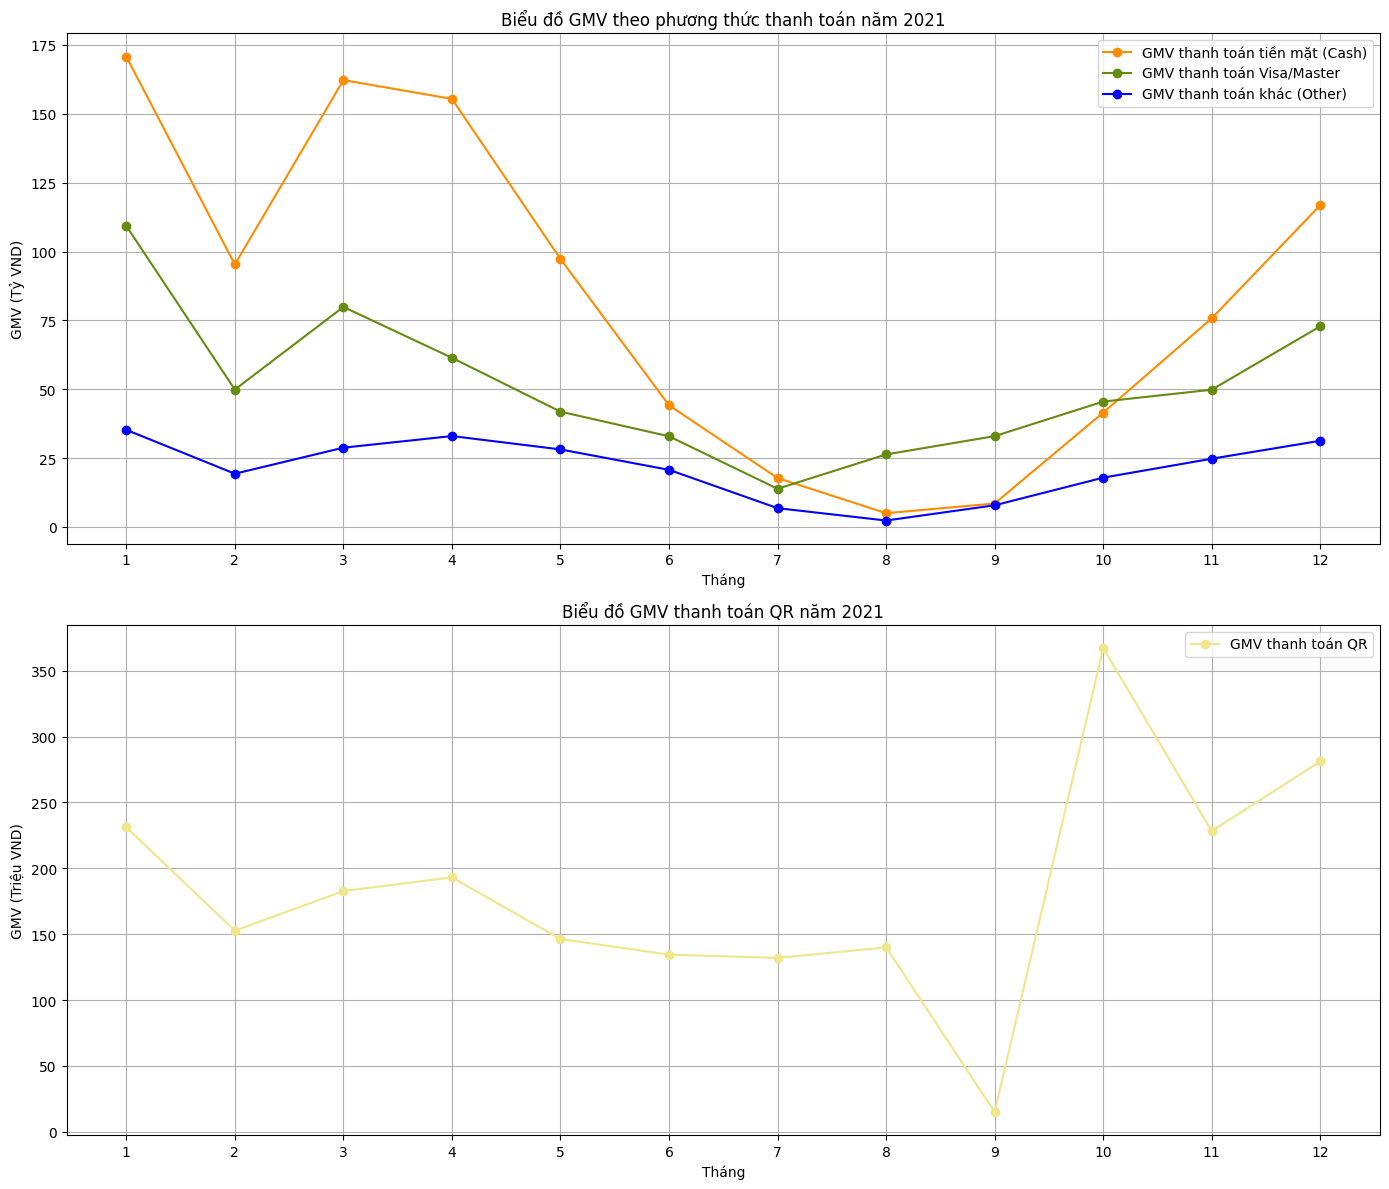

In [147]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(14, 12))

months = np.arange(1, 13)

df_payment_cash_2021_ = df_payment_cash_2021['GMV_payment_cash'].values
df_payment_visa_master_2021_ = df_payment_visa_master_2021['GMV_payment_visa_master'].values
df_payment_QR_2021_ = df_payment_QR_2021['GMV_QRpayment'].values
df_payment_other_2021_ = df_payment_other_2021['GMV_payment_other'].values

plt.subplot(2, 1, 1)
plt.plot(months[:12], df_payment_cash_2021_[:12], label='GMV thanh toán tiền mặt (Cash)', marker='o', color='#ff8c00')
plt.plot(months[:12], df_payment_visa_master_2021_[:12], label='GMV thanh toán Visa/Master', marker='o', color='#648c11')
plt.plot(months[:12], df_payment_other_2021_[:12], label='GMV thanh toán khác (Other)', marker='o', color='blue')
plt.xlabel('Tháng')
plt.ylabel('GMV (Tỷ VND)')
plt.title('Biểu đồ GMV theo phương thức thanh toán năm 2021')
def billion_vnd_format(x, pos):
    return f'{int(x / 1e9)}'
formatter = FuncFormatter(billion_vnd_format)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(ticks=months[:12])
plt.legend()
plt.grid(True)


plt.subplot(2, 1, 2)
plt.plot(months[:12], df_payment_QR_2021_[:12], label='GMV thanh toán QR', marker='o', color='#f0e68c')
plt.xlabel('Tháng')
plt.ylabel('GMV (Triệu VND)')
plt.title('Biểu đồ GMV thanh toán QR năm 2021')
def billion_vnd_format(x, pos):
    return f'{int(x / 1e6)}'
formatter = FuncFormatter(billion_vnd_format)
plt.gca().yaxis.set_major_formatter(formatter)
plt.legend()
plt.grid(True)
plt.xticks(ticks=months[:12])

plt.tight_layout()

plt.tight_layout()
plt.show()


##GMV Payment 2022 Line Chart

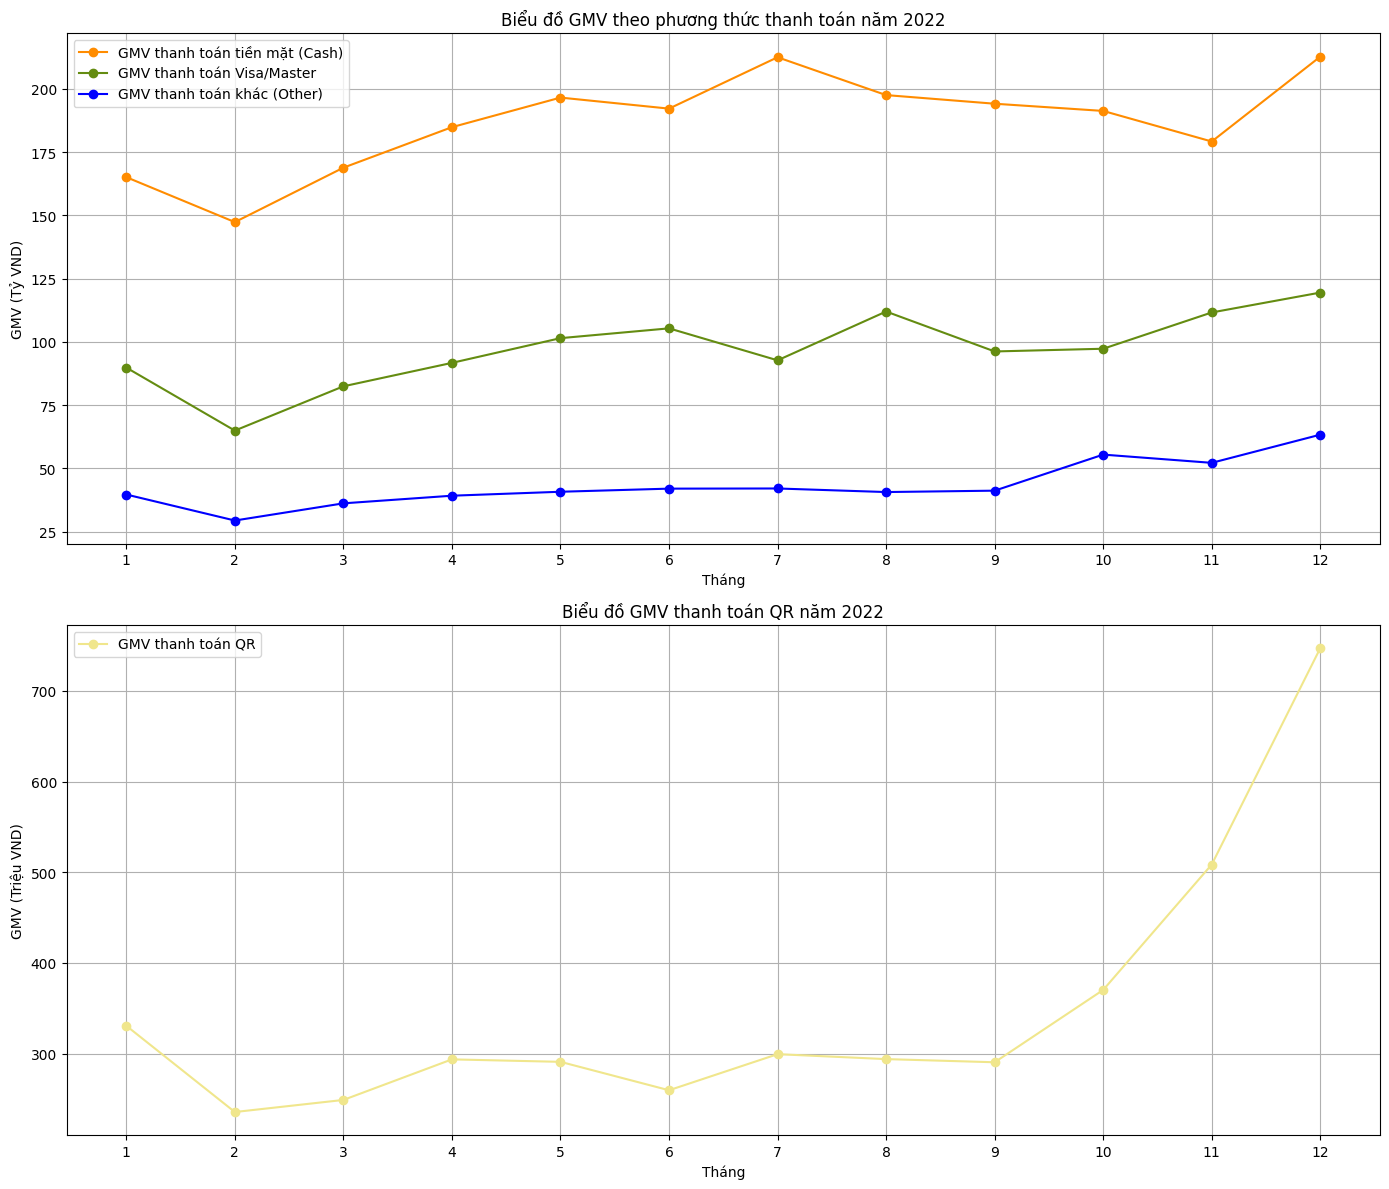

In [148]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(14, 12))

months = np.arange(1, 13)

df_payment_cash_2022_ = df_payment_cash_2022['GMV_payment_cash'].values
df_payment_visa_master_2022_ = df_payment_visa_master_2022['GMV_payment_visa_master'].values
df_payment_QR_2022_ = df_payment_QR_2022['GMV_QRpayment'].values
df_payment_other_2022_ = df_payment_other_2022['GMV_payment_other'].values

plt.subplot(2, 1, 1)
plt.plot(months[:12], df_payment_cash_2022_[:12], label='GMV thanh toán tiền mặt (Cash)', marker='o', color='#ff8c00')
plt.plot(months[:12], df_payment_visa_master_2022_[:12], label='GMV thanh toán Visa/Master', marker='o', color='#648c11')
plt.plot(months[:12], df_payment_other_2022_[:12], label='GMV thanh toán khác (Other)', marker='o', color='blue')
plt.xlabel('Tháng')
plt.ylabel('GMV (Tỷ VND)')
plt.title('Biểu đồ GMV theo phương thức thanh toán năm 2022')
def billion_vnd_format(x, pos):
    return f'{int(x / 1e9)}'

formatter = FuncFormatter(billion_vnd_format)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(ticks=months[:12])
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(months[:12], df_payment_QR_2022_[:12], label='GMV thanh toán QR', marker='o', color='#f0e68c')
plt.xlabel('Tháng')
plt.ylabel('GMV (Triệu VND)')
plt.title('Biểu đồ GMV thanh toán QR năm 2022')
def billion_vnd_format(x, pos):
    return f'{int(x / 1e6)}'
formatter = FuncFormatter(billion_vnd_format)
plt.gca().yaxis.set_major_formatter(formatter)
plt.legend()
plt.grid(True)
plt.xticks(ticks=months[:12])

plt.tight_layout()
plt.tight_layout()
plt.show()


##GMV Payment 2023 Line Chart

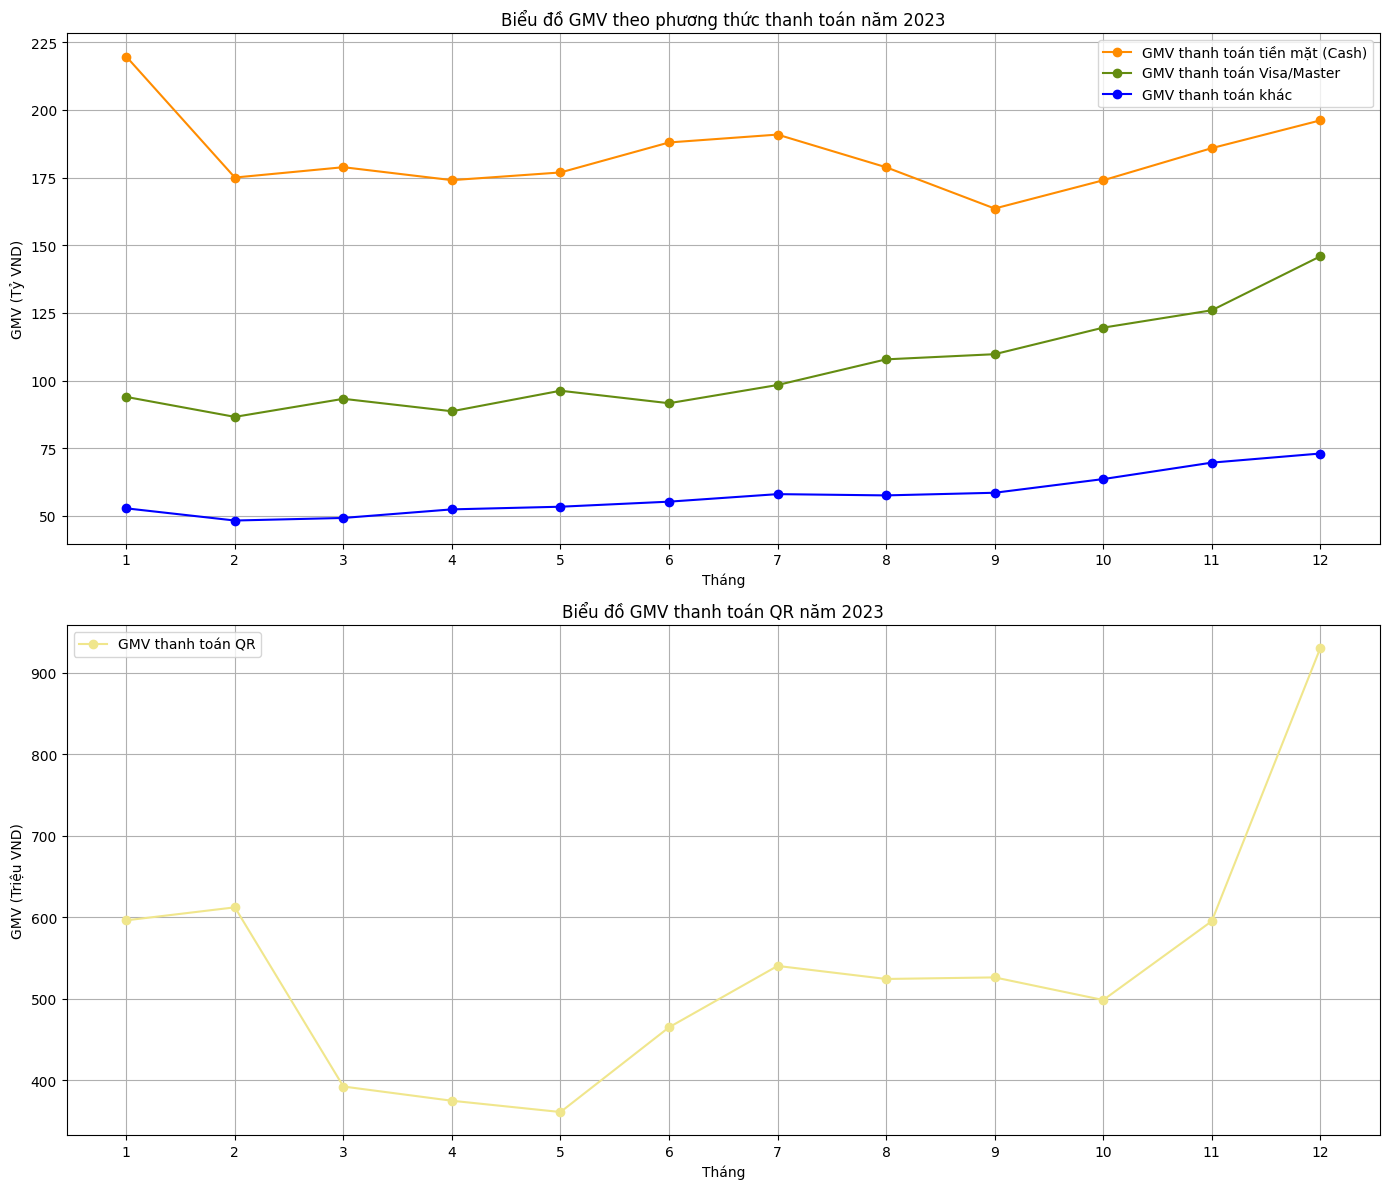

In [149]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(14, 12))
months = np.arange(1, 13)

df_payment_cash_2023_ = df_payment_cash_2023['GMV_payment_cash'].values
df_payment_visa_master_2023_ = df_payment_visa_master_2023['GMV_payment_visa_master'].values
df_payment_QR_2023_ = df_payment_QR_2023['GMV_QRpayment'].values
df_payment_other_2023_ = df_payment_other_2023['GMV_payment_other'].values


plt.subplot(2, 1, 1)
plt.plot(months[:12], df_payment_cash_2023_[:12], label='GMV thanh toán tiền mặt (Cash)', marker='o', color='#ff8c00')
plt.plot(months[:12], df_payment_visa_master_2023_[:12], label='GMV thanh toán Visa/Master', marker='o', color='#648c11')
plt.plot(months[:12], df_payment_other_2023_[:12], label='GMV thanh toán khác', marker='o', color='blue')
plt.xlabel('Tháng')
plt.ylabel('GMV (Tỷ VND)')
plt.title('Biểu đồ GMV theo phương thức thanh toán năm 2023')
def billion_vnd_format(x, pos):
    return f'{int(x / 1e9)}'

formatter = FuncFormatter(billion_vnd_format)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(ticks=months[:12])
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(months[:12], df_payment_QR_2023_[:12], label='GMV thanh toán QR', marker='o', color='#f0e68c')
plt.xlabel('Tháng')
plt.ylabel('GMV (Triệu VND)')
plt.title('Biểu đồ GMV thanh toán QR năm 2023')
def billion_vnd_format(x, pos):
    return f'{int(x / 1e6)}'

formatter = FuncFormatter(billion_vnd_format)
plt.gca().yaxis.set_major_formatter(formatter)
plt.legend()
plt.grid(True)
plt.xticks(ticks=months[:12])

plt.tight_layout()

plt.tight_layout()
plt.show()


##GMV Payment 2024 Line Chart

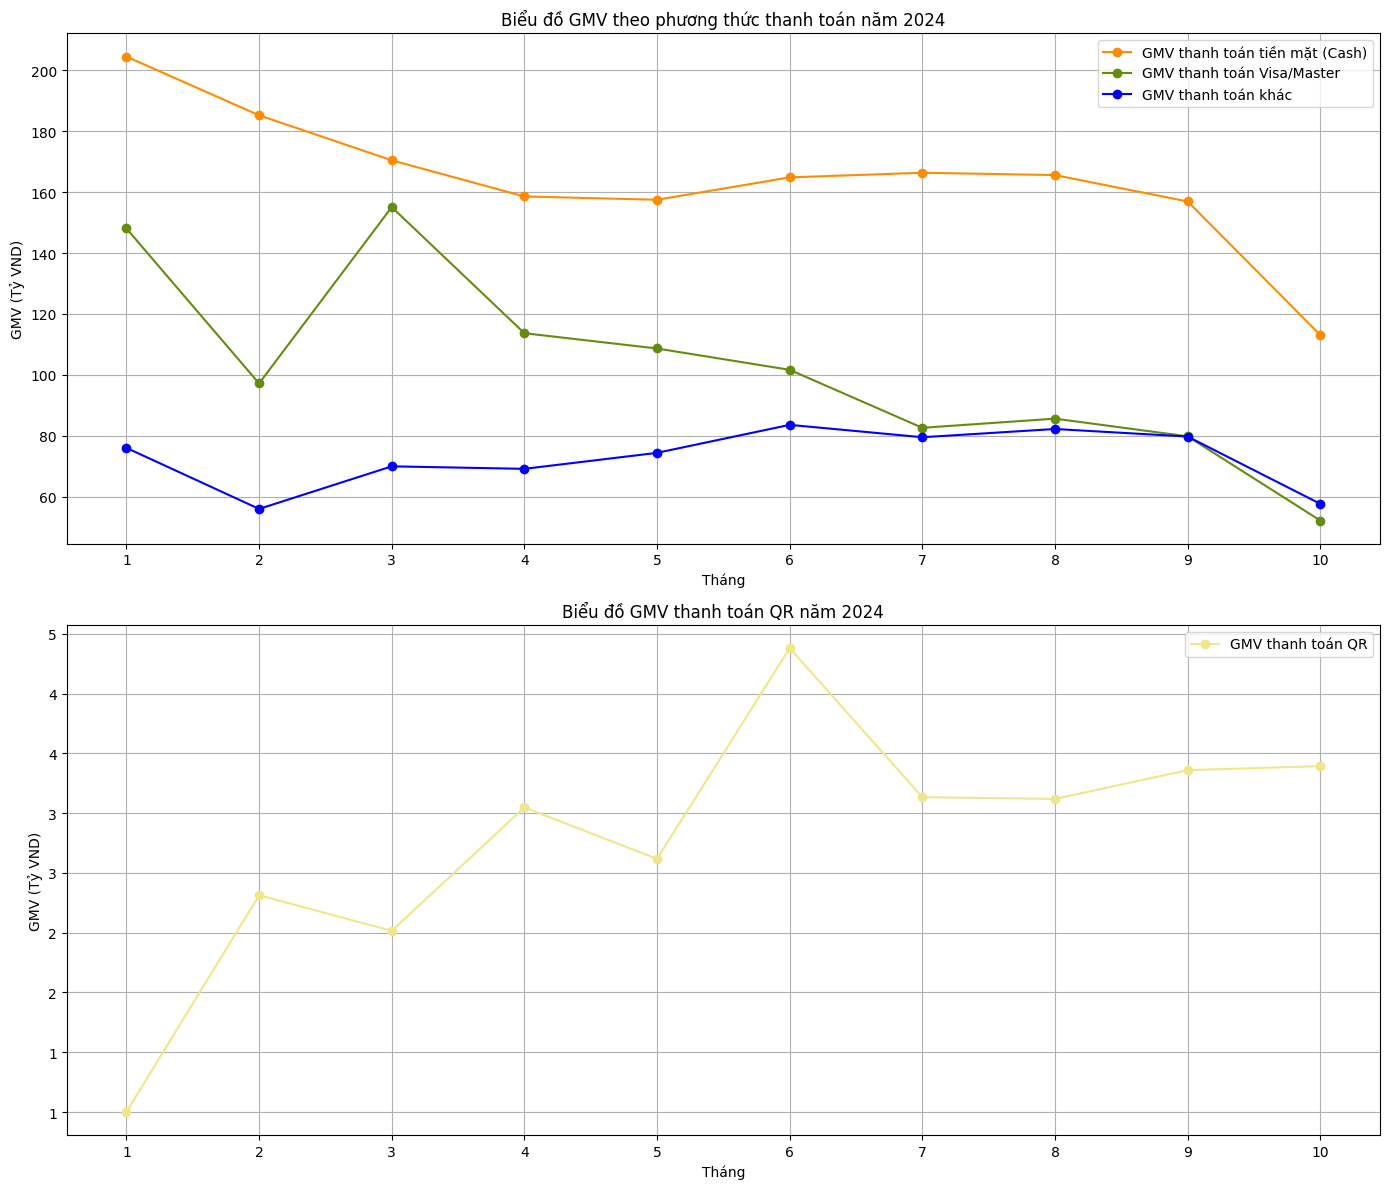

In [150]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(14, 12))

months = np.arange(1, 13)

df_payment_cash_2024_ = df_payment_cash_2024['GMV_payment_cash'].values
df_payment_visa_master_2024_ = df_payment_visa_master_2024['GMV_payment_visa_master'].values
df_payment_QR_2024_ = df_payment_QR_2024['GMV_QRpayment'].values
df_payment_other_2024_ = df_payment_other_2024['GMV_payment_other'].values

plt.subplot(2, 1, 1)
plt.plot(months[:10], df_payment_cash_2024_[:10], label='GMV thanh toán tiền mặt (Cash)', marker='o', color='#ff8c00')
plt.plot(months[:10], df_payment_visa_master_2024_[:10], label='GMV thanh toán Visa/Master', marker='o', color='#648c11')
plt.plot(months[:10], df_payment_other_2024_[:10], label='GMV thanh toán khác', marker='o', color='blue')
plt.xlabel('Tháng')
plt.ylabel('GMV (Tỷ VND)')
plt.title('Biểu đồ GMV theo phương thức thanh toán năm 2024')
def billion_vnd_format(x, pos):
    return f'{int(x / 1e9)}'

formatter = FuncFormatter(billion_vnd_format)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(ticks=months[:10])
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(months[:10], df_payment_QR_2024_[:10], label='GMV thanh toán QR', marker='o', color='#f0e68c')
plt.xlabel('Tháng')
plt.ylabel('GMV (Tỷ VND)')
plt.title('Biểu đồ GMV thanh toán QR năm 2024')
def billion_vnd_format(x, pos):
    return f'{int(x / 1e9)}'

formatter = FuncFormatter(billion_vnd_format)
plt.gca().yaxis.set_major_formatter(formatter)
plt.legend()
plt.grid(True)
plt.xticks(ticks=months[:10])

plt.tight_layout()

plt.tight_layout()
plt.show()


##GMV Other_Payment 2020-2024 Bar Chart

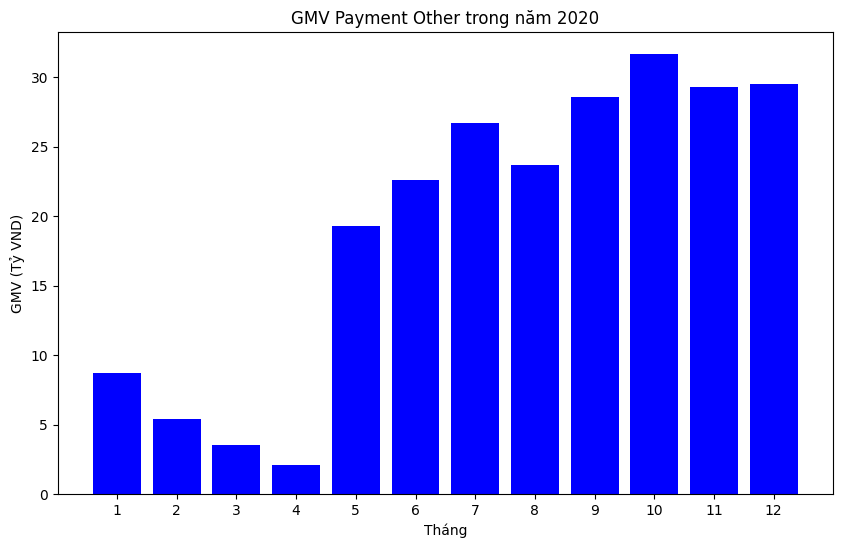

In [151]:
plt.figure(figsize=(10, 6))
plt.bar(df_payment_other_2020['MONTH'], df_payment_other_2020['GMV_payment_other'], color='blue')
plt.xlabel('Tháng')
plt.ylabel('GMV (Tỷ VND)')
plt.title('GMV Payment Other trong năm 2020')
plt.xticks(df_payment_other_2020['MONTH'])
def billion_vnd_format(x, pos):
    return f'{int(x / 1e9)}'

formatter = FuncFormatter(billion_vnd_format)
plt.gca().yaxis.set_major_formatter(formatter)
# plt.legend()
# plt.grid(True)
plt.xticks(ticks=months[:12])

plt.show()

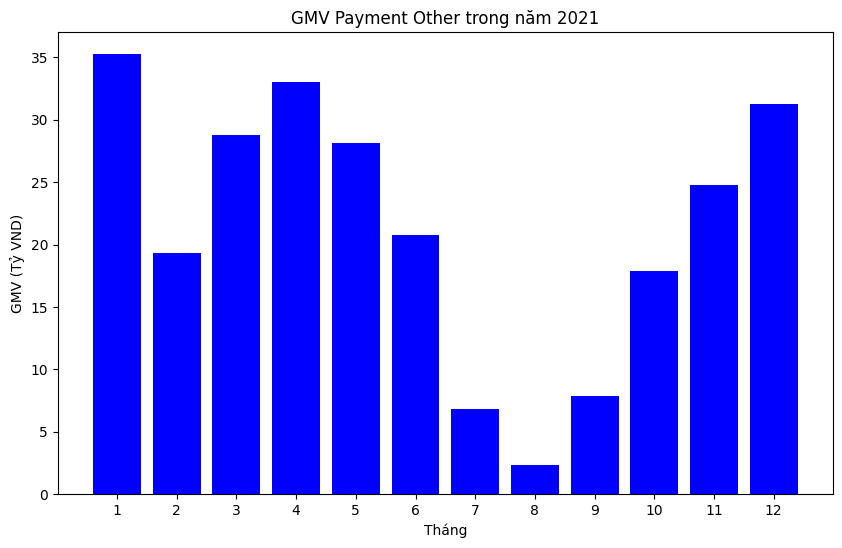

In [152]:

plt.figure(figsize=(10, 6))
plt.bar(df_payment_other_2021['MONTH'], df_payment_other_2021['GMV_payment_other'], color='blue')
plt.xlabel('Tháng')
plt.ylabel('GMV (Tỷ VND)')
plt.title('GMV Payment Other trong năm 2021')
plt.xticks(df_payment_other_2021['MONTH'])
def billion_vnd_format(x, pos):
    return f'{int(x / 1e9)}'

formatter = FuncFormatter(billion_vnd_format)
plt.gca().yaxis.set_major_formatter(formatter)
# plt.legend()
# plt.grid(True)
plt.xticks(ticks=months[:12])
plt.show()

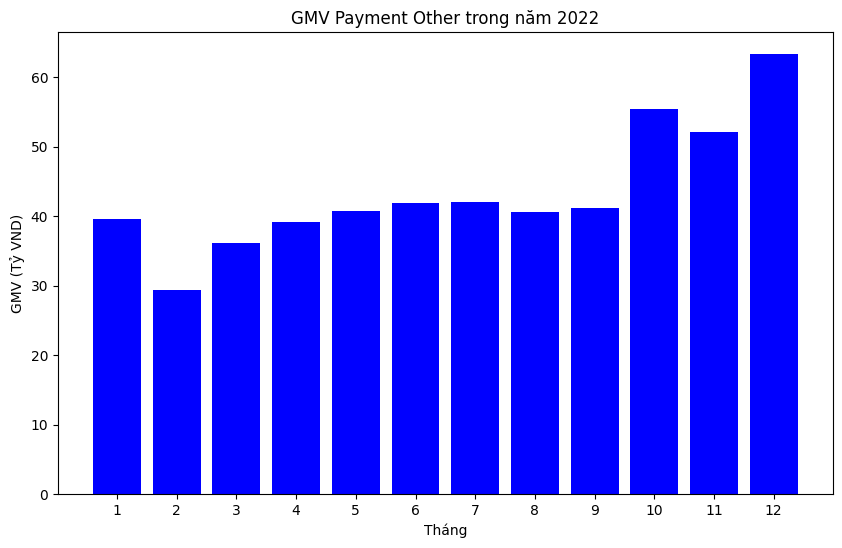

In [153]:

plt.figure(figsize=(10, 6))
plt.bar(df_payment_other_2022['MONTH'], df_payment_other_2022['GMV_payment_other'], color='blue')
plt.xlabel('Tháng')
plt.ylabel('GMV (Tỷ VND)')
plt.title('GMV Payment Other trong năm 2022')
plt.xticks(df_payment_other_2022['MONTH'])
def billion_vnd_format(x, pos):
    return f'{int(x / 1e9)}'

formatter = FuncFormatter(billion_vnd_format)
plt.gca().yaxis.set_major_formatter(formatter)
# plt.legend()
# plt.grid(True)
plt.xticks(ticks=months[:12])
plt.show()

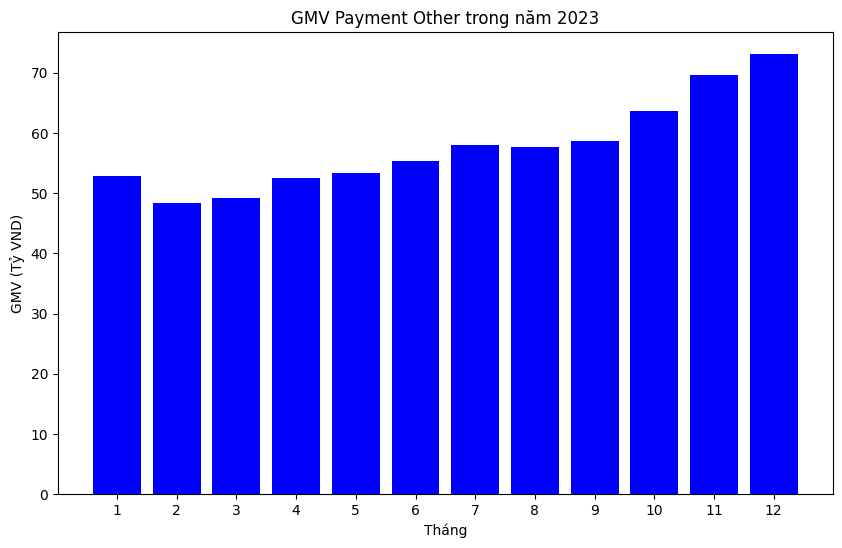

In [154]:
plt.figure(figsize=(10, 6))
plt.bar(df_payment_other_2023['MONTH'], df_payment_other_2023['GMV_payment_other'], color='blue')
plt.xlabel('Tháng')
plt.ylabel('GMV (Tỷ VND)')
plt.title('GMV Payment Other trong năm 2023')
plt.xticks(df_payment_other_2023['MONTH'])
def billion_vnd_format(x, pos):
    return f'{int(x / 1e9)}'

formatter = FuncFormatter(billion_vnd_format)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(ticks=months[:12])
plt.show()

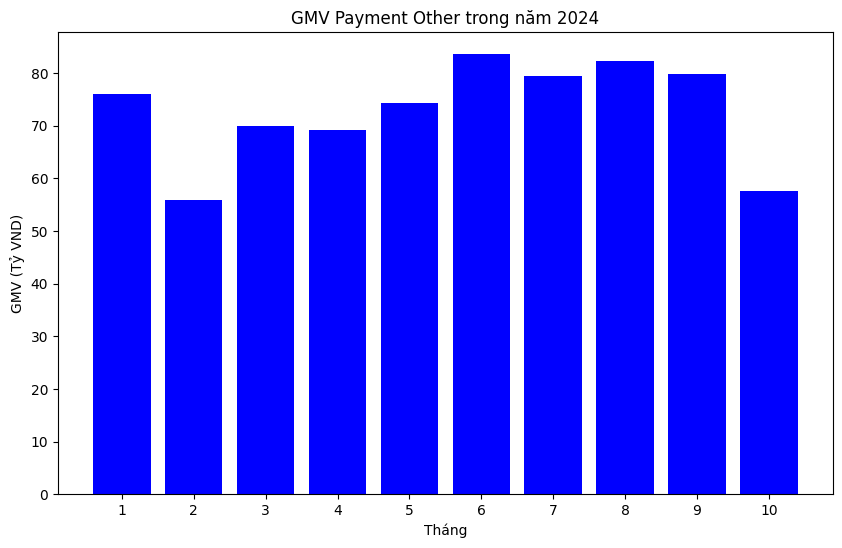

In [155]:
plt.figure(figsize=(10, 6))
plt.bar(df_payment_other_2024['MONTH'], df_payment_other_2024['GMV_payment_other'], color='blue')
plt.xlabel('Tháng')
plt.ylabel('GMV (Tỷ VND)')
plt.title('GMV Payment Other trong năm 2024')
plt.xticks(df_payment_other_2024['MONTH'])
def billion_vnd_format(x, pos):
    return f'{int(x / 1e9)}'

formatter = FuncFormatter(billion_vnd_format)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xticks(ticks=months[:10])
plt.show()

##GMV Cash_Payment 2020-2024 Chart Bar

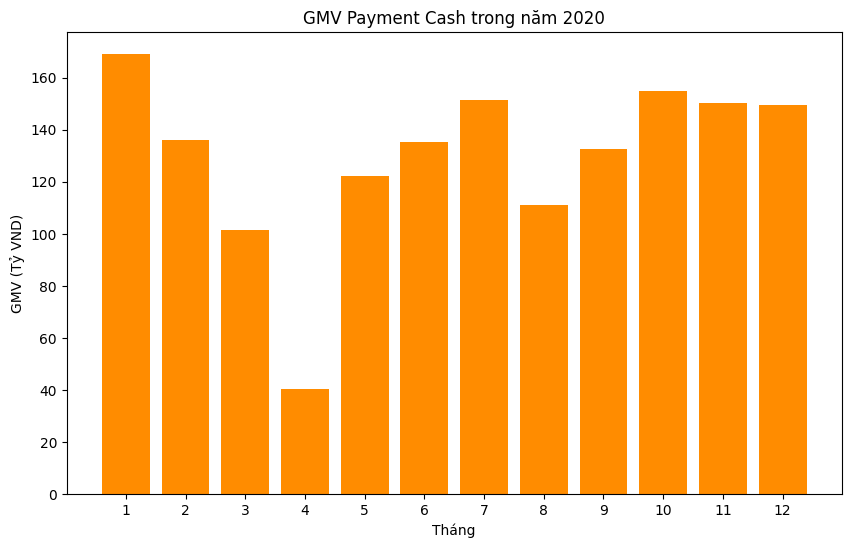

In [156]:
plt.figure(figsize=(10, 6))
plt.bar(df_payment_cash_2020['MONTH'], df_payment_cash_2020['GMV_payment_cash'], color='#ff8c00')
plt.xlabel('Tháng')
plt.ylabel('GMV (Tỷ VND)')
plt.title('GMV Payment Cash trong năm 2020')
plt.xticks(df_payment_cash_2020['MONTH'])
def billion_vnd_format(x, pos):
    return f'{int(x / 1e9)}'

formatter = FuncFormatter(billion_vnd_format)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(ticks=months[:12])

plt.show()

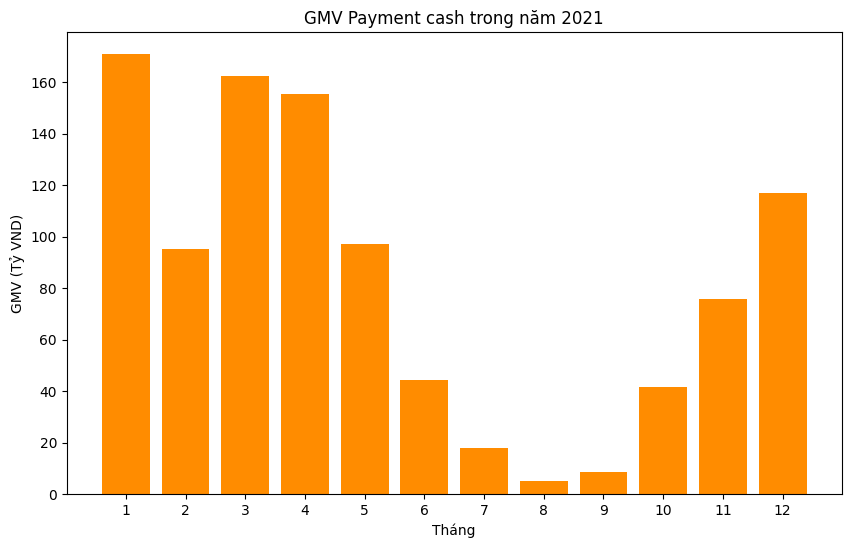

In [157]:
plt.figure(figsize=(10, 6))
plt.bar(df_payment_cash_2021['MONTH'], df_payment_cash_2021['GMV_payment_cash'], color='#ff8c00')
plt.xlabel('Tháng')
plt.ylabel('GMV (Tỷ VND)')
plt.title('GMV Payment cash trong năm 2021')
plt.xticks(df_payment_cash_2021['MONTH'])
def billion_vnd_format(x, pos):
    return f'{int(x / 1e9)}'

formatter = FuncFormatter(billion_vnd_format)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(ticks=months[:12])

plt.show()

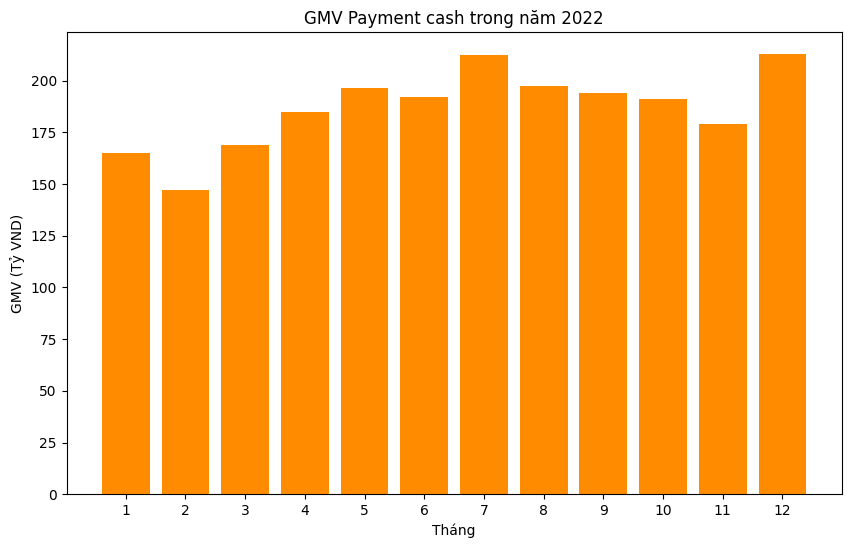

In [158]:
plt.figure(figsize=(10, 6))
plt.bar(df_payment_cash_2022['MONTH'], df_payment_cash_2022['GMV_payment_cash'], color='#ff8c00')
plt.xlabel('Tháng')
plt.ylabel('GMV (Tỷ VND)')
plt.title('GMV Payment cash trong năm 2022')
plt.xticks(df_payment_cash_2022['MONTH'])
def billion_vnd_format(x, pos):
    return f'{int(x / 1e9)}'

formatter = FuncFormatter(billion_vnd_format)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(ticks=months[:12])

plt.show()

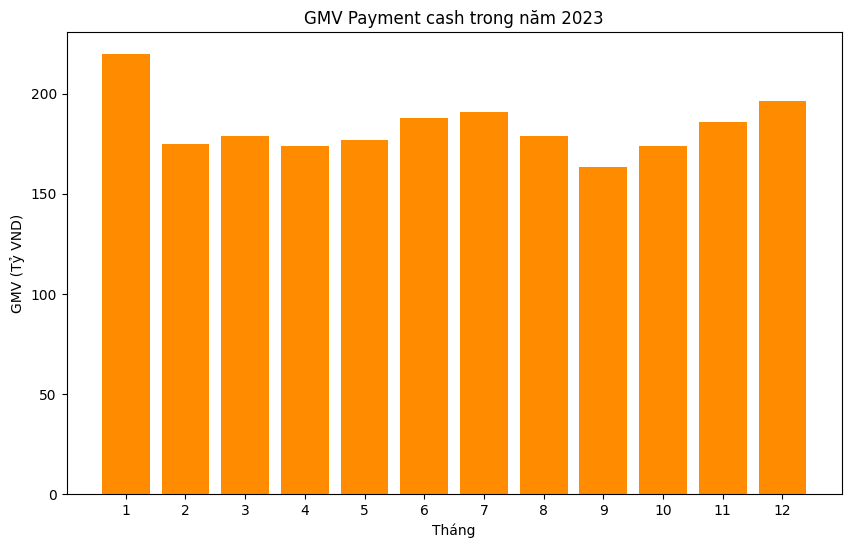

In [159]:
plt.figure(figsize=(10, 6))
plt.bar(df_payment_cash_2023['MONTH'], df_payment_cash_2023['GMV_payment_cash'], color='#ff8c00')
plt.xlabel('Tháng')
plt.ylabel('GMV (Tỷ VND)')
plt.title('GMV Payment cash trong năm 2023')
plt.xticks(df_payment_cash_2023['MONTH'])
def billion_vnd_format(x, pos):
    return f'{int(x / 1e9)}'
formatter = FuncFormatter(billion_vnd_format)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(ticks=months[:12])

plt.show()

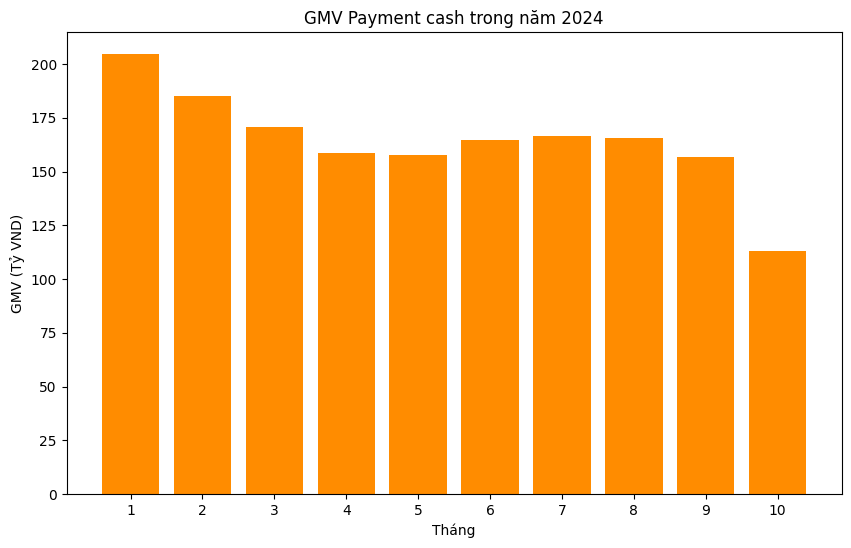

In [160]:
plt.figure(figsize=(10, 6))
plt.bar(df_payment_cash_2024['MONTH'], df_payment_cash_2024['GMV_payment_cash'], color='#ff8c00')
plt.xlabel('Tháng')
plt.ylabel('GMV (Tỷ VND)')
plt.title('GMV Payment cash trong năm 2024')
plt.xticks(df_payment_cash_2024['MONTH'])
def billion_vnd_format(x, pos):
    return f'{int(x / 1e9)}'
formatter = FuncFormatter(billion_vnd_format)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(ticks=months[:10])

plt.show()

##GMV Visa/Master_Payment 2020-2024 Chart Bar

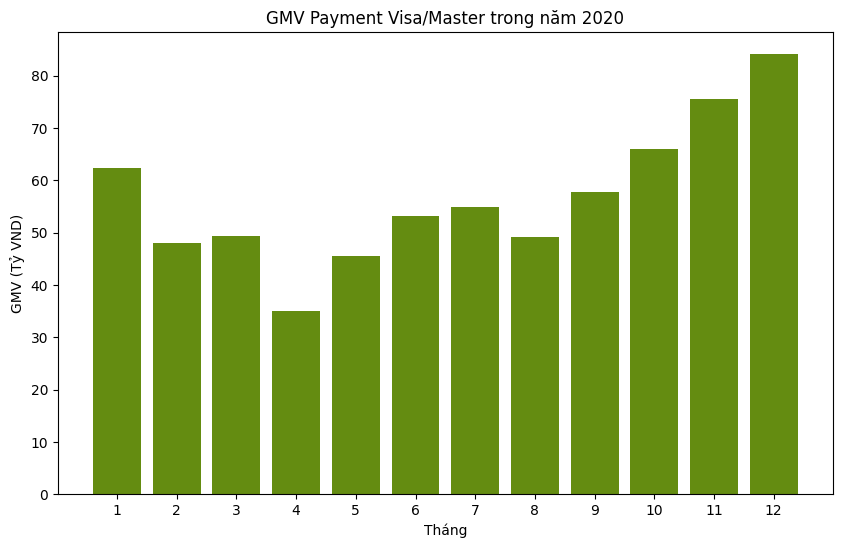

In [161]:
plt.figure(figsize=(10, 6))
plt.bar(df_payment_visa_master_2020['MONTH'], df_payment_visa_master_2020['GMV_payment_visa_master'], color='#648c11')
plt.xlabel('Tháng')
plt.ylabel('GMV (Tỷ VND)')
plt.title('GMV Payment Visa/Master trong năm 2020')
plt.xticks(df_payment_visa_master_2020['MONTH'])
def billion_vnd_format(x, pos):
    return f'{int(x / 1e9)}'

formatter = FuncFormatter(billion_vnd_format)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(ticks=months[:12])

plt.show()

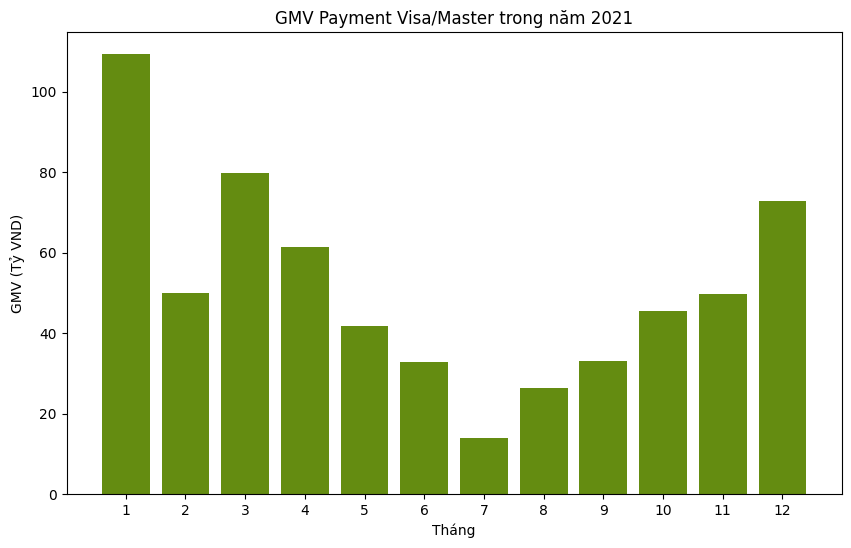

In [162]:
plt.figure(figsize=(10, 6))
plt.bar(df_payment_visa_master_2021['MONTH'], df_payment_visa_master_2021['GMV_payment_visa_master'], color='#648c11')
plt.xlabel('Tháng')
plt.ylabel('GMV (Tỷ VND)')
plt.title('GMV Payment Visa/Master trong năm 2021')
plt.xticks(df_payment_visa_master_2021['MONTH'])
def billion_vnd_format(x, pos):
    return f'{int(x / 1e9)}'
formatter = FuncFormatter(billion_vnd_format)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(ticks=months[:12])
plt.show()

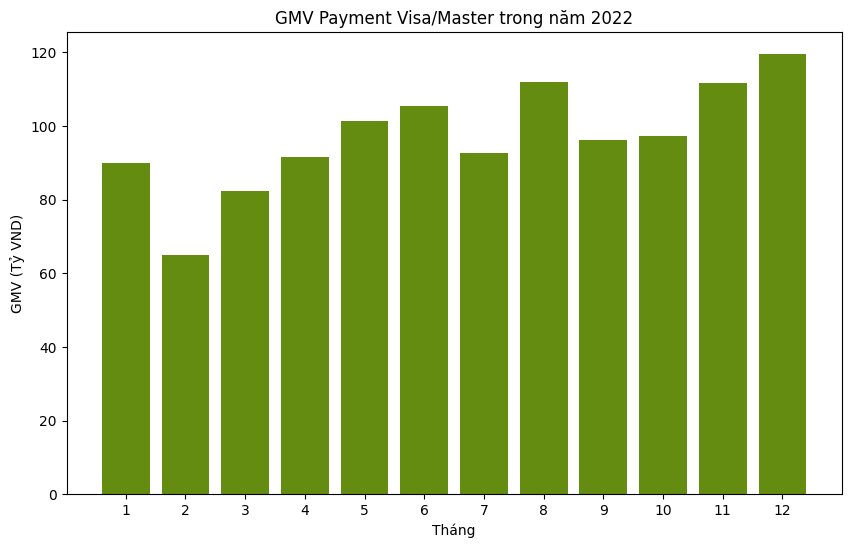

In [163]:
plt.figure(figsize=(10, 6))
plt.bar(df_payment_visa_master_2022['MONTH'], df_payment_visa_master_2022['GMV_payment_visa_master'], color='#648c11')
plt.xlabel('Tháng')
plt.ylabel('GMV (Tỷ VND)')
plt.title('GMV Payment Visa/Master trong năm 2022')
plt.xticks(df_payment_visa_master_2022['MONTH'])
def billion_vnd_format(x, pos):
    return f'{int(x / 1e9)}'
formatter = FuncFormatter(billion_vnd_format)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(ticks=months[:12])
plt.show()

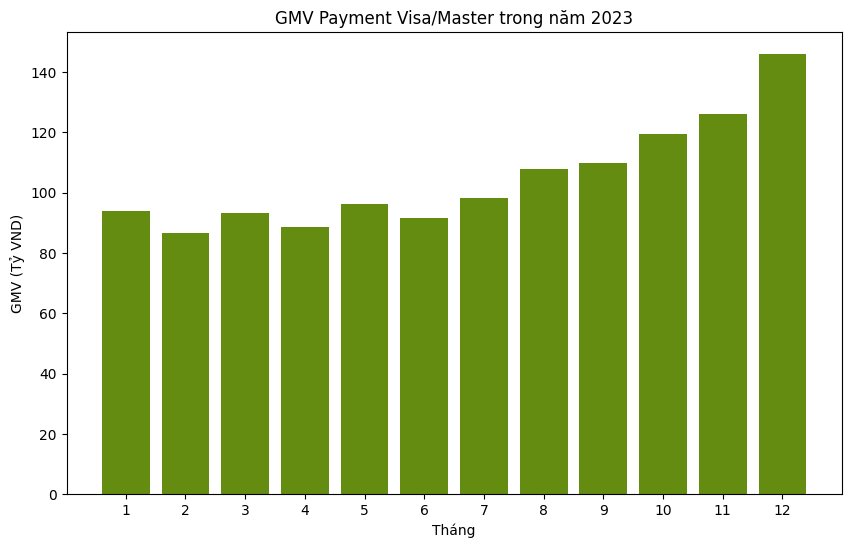

In [164]:
plt.figure(figsize=(10, 6))
plt.bar(df_payment_visa_master_2023['MONTH'], df_payment_visa_master_2023['GMV_payment_visa_master'], color='#648c11')
plt.xlabel('Tháng')
plt.ylabel('GMV (Tỷ VND)')
plt.title('GMV Payment Visa/Master trong năm 2023')
plt.xticks(df_payment_visa_master_2023['MONTH'])
def billion_vnd_format(x, pos):
    return f'{int(x / 1e9)}'
formatter = FuncFormatter(billion_vnd_format)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(ticks=months[:12])
plt.show()

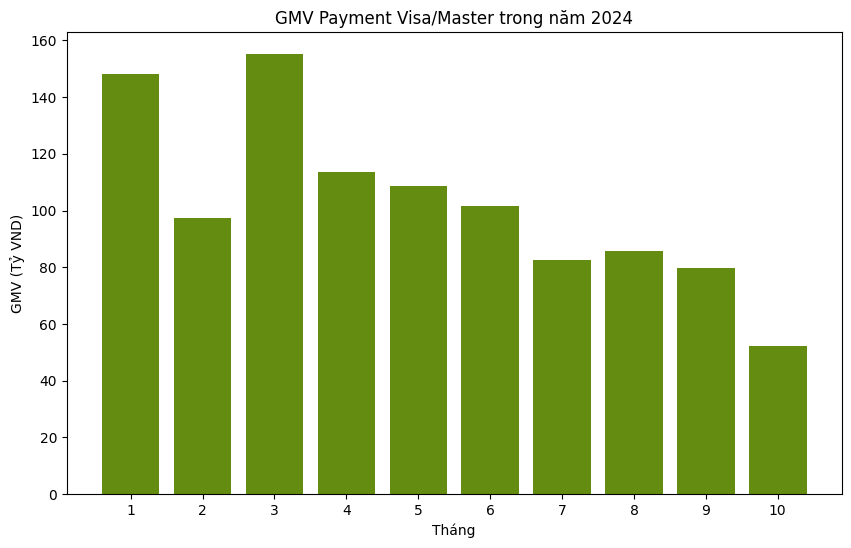

In [165]:
plt.figure(figsize=(10, 6))
plt.bar(df_payment_visa_master_2024['MONTH'], df_payment_visa_master_2024['GMV_payment_visa_master'], color='#648c11')
plt.xlabel('Tháng')
plt.ylabel('GMV (Tỷ VND)')
plt.title('GMV Payment Visa/Master trong năm 2024')
plt.xticks(df_payment_visa_master_2024['MONTH'])
def billion_vnd_format(x, pos):
    return f'{int(x / 1e9)}'
formatter = FuncFormatter(billion_vnd_format)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(ticks=months[:10])
plt.show()

##GMV QR_Code_Payment 2020-2024 Chart Bar

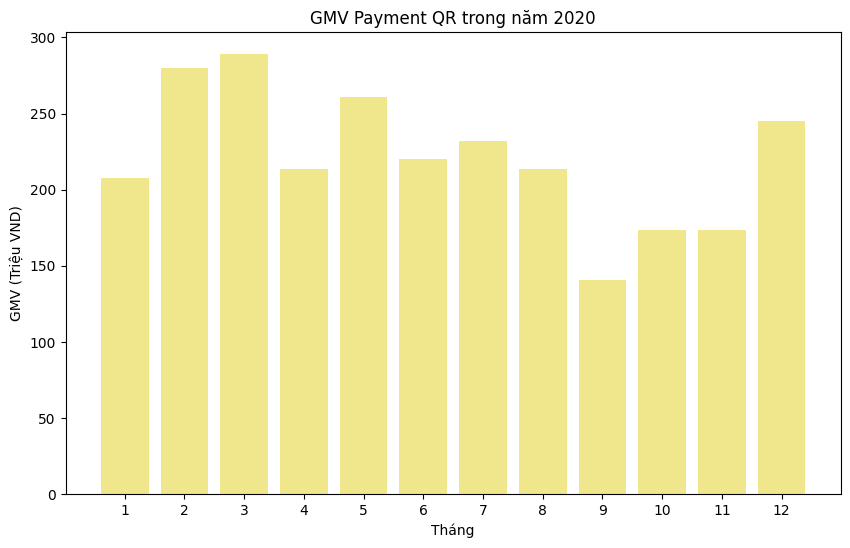

In [166]:
plt.figure(figsize=(10, 6))
plt.bar(df_payment_QR_2020['MONTH'], df_payment_QR_2020['GMV_QRpayment'], color='#f0e68c')
plt.xlabel('Tháng')
plt.ylabel('GMV (Triệu VND)')
plt.title('GMV Payment QR trong năm 2020')
plt.xticks(df_payment_QR_2020['MONTH'])
def billion_vnd_format(x, pos):
    return f'{int(x / 1e6)}'
formatter = FuncFormatter(billion_vnd_format)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(ticks=months[:12])
plt.show()

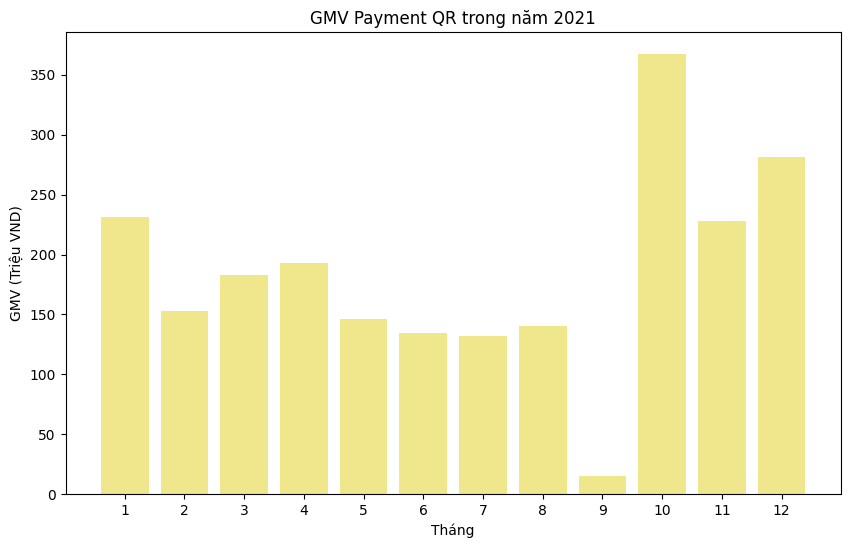

In [167]:
plt.figure(figsize=(10, 6))
plt.bar(df_payment_QR_2021['MONTH'], df_payment_QR_2021['GMV_QRpayment'], color='#f0e68c')
plt.xlabel('Tháng')
plt.ylabel('GMV (Triệu VND)')
plt.title('GMV Payment QR trong năm 2021')
plt.xticks(df_payment_QR_2021['MONTH'])
def billion_vnd_format(x, pos):
    return f'{int(x / 1e6)}'
formatter = FuncFormatter(billion_vnd_format)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(ticks=months[:12])
plt.show()

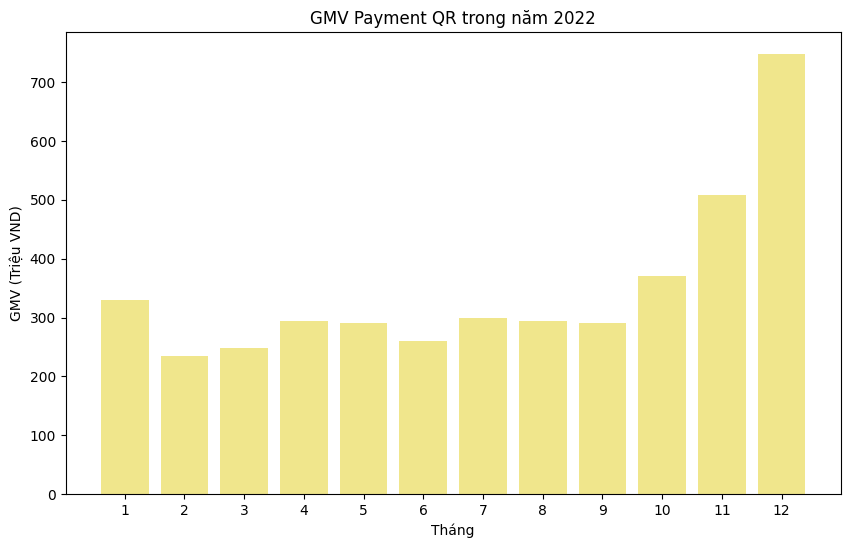

In [168]:
plt.figure(figsize=(10, 6))
plt.bar(df_payment_QR_2022['MONTH'], df_payment_QR_2022['GMV_QRpayment'], color='#f0e68c')
plt.xlabel('Tháng')
plt.ylabel('GMV (Triệu VND)')
plt.title('GMV Payment QR trong năm 2022')
plt.xticks(df_payment_QR_2022['MONTH'])
def billion_vnd_format(x, pos):
    return f'{int(x / 1e6)}'
formatter = FuncFormatter(billion_vnd_format)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(ticks=months[:12])
plt.show()

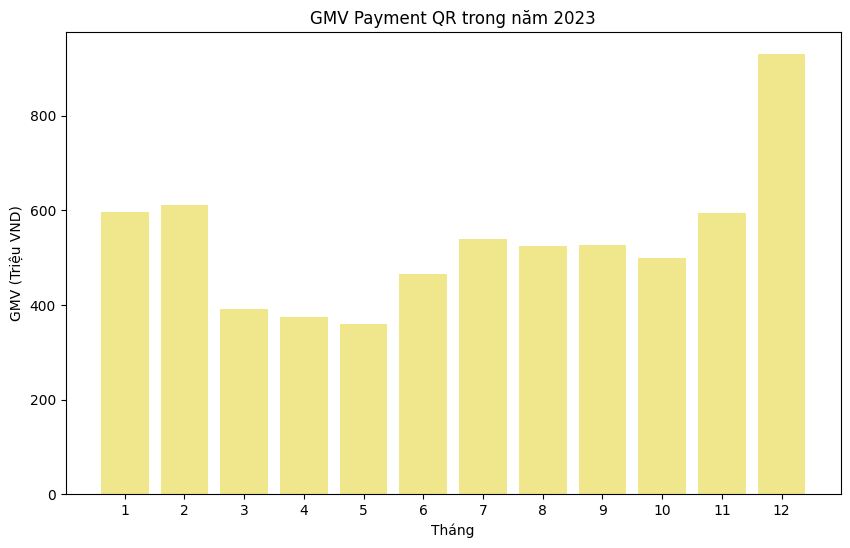

In [169]:
plt.figure(figsize=(10, 6))
plt.bar(df_payment_QR_2023['MONTH'], df_payment_QR_2023['GMV_QRpayment'], color='#f0e68c')
plt.xlabel('Tháng')
plt.ylabel('GMV (Triệu VND)')
plt.title('GMV Payment QR trong năm 2023')
plt.xticks(df_payment_QR_2023['MONTH'])
def billion_vnd_format(x, pos):
    return f'{int(x / 1e6)}'
formatter = FuncFormatter(billion_vnd_format)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(ticks=months[:12])
plt.show()

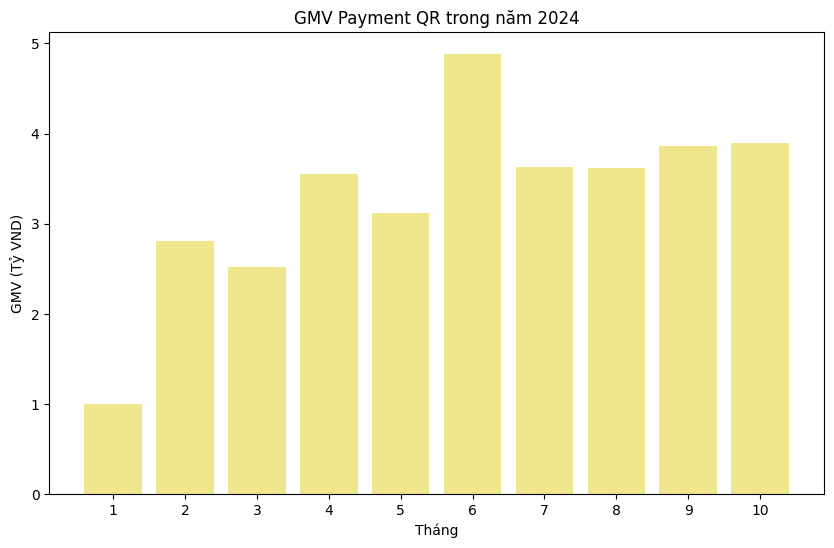

In [170]:
plt.figure(figsize=(10, 6))
plt.bar(df_payment_QR_2024['MONTH'], df_payment_QR_2024['GMV_QRpayment'], color='#f0e68c')
plt.xlabel('Tháng')
plt.ylabel('GMV (Tỷ VND)')
plt.title('GMV Payment QR trong năm 2024')
plt.xticks(df_payment_QR_2024['MONTH'])
def billion_vnd_format(x, pos):
    return f'{int(x / 1e9)}'
formatter = FuncFormatter(billion_vnd_format)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(ticks=months[:10])
plt.show()

In [171]:
df_payment_QR_2024

,YEAR,MONTH,GMV_QRpayment
0,2024,1,999840953.00
1,2024,2,2812955765.00
2,2024,3,2515138801.00
3,2024,4,3547998150.00
4,2024,5,3117561531.00
5,2024,6,4880269908.00
6,2024,7,3633501091.00
7,2024,8,3618696316.00
8,2024,9,3859324662.00
9,2024,10,3893260180.00


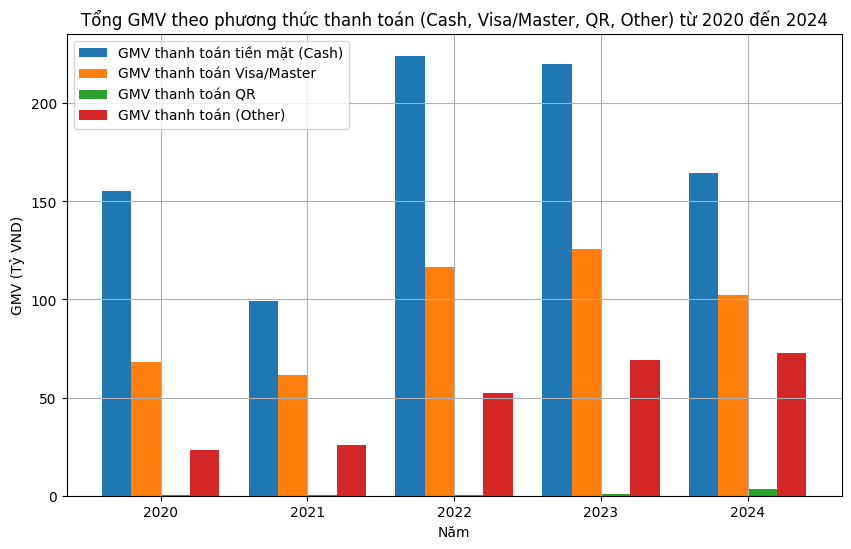

In [172]:
# Vertical axis format function displays as VND billion
def billion_vnd_format(x, pos):
    return f'{int(x / 1e10)}'

# Listings assume total GMV for each year and each payment method
years = np.array([2020, 2021, 2022, 2023, 2024])

# Let's say you've calculated the total GMV for each payment method by year
GMV_cash = np.array([sum(df_payment_cash_2020['GMV_payment_cash']),
                     sum(df_payment_cash_2021['GMV_payment_cash']),
                     sum(df_payment_cash_2022['GMV_payment_cash']),
                     sum(df_payment_cash_2023['GMV_payment_cash']),
                     sum(df_payment_cash_2024['GMV_payment_cash'])])

GMV_visa_master = np.array([sum(df_payment_visa_master_2020['GMV_payment_visa_master']),
                            sum(df_payment_visa_master_2021['GMV_payment_visa_master']),
                            sum(df_payment_visa_master_2022['GMV_payment_visa_master']),
                            sum(df_payment_visa_master_2023['GMV_payment_visa_master']),
                            sum(df_payment_visa_master_2024['GMV_payment_visa_master'])])

GMV_QR = np.array([sum(df_payment_QR_2020['GMV_QRpayment']),
                   sum(df_payment_QR_2021['GMV_QRpayment']),
                   sum(df_payment_QR_2022['GMV_QRpayment']),
                   sum(df_payment_QR_2023['GMV_QRpayment']),
                   sum(df_payment_QR_2024['GMV_QRpayment'])])

GMV_other = np.array([sum(df_payment_other_2020['GMV_payment_other']),
                      sum(df_payment_other_2021['GMV_payment_other']),
                      sum(df_payment_other_2022['GMV_payment_other']),
                      sum(df_payment_other_2023['GMV_payment_other']),
                      sum(df_payment_other_2024['GMV_payment_other'])])

width = 0.2
plt.figure(figsize=(10, 6))

# Draw columns for each payment method
plt.bar(years - 1.5 * width, GMV_cash, width=width, label='GMV thanh toán tiền mặt (Cash)')
plt.bar(years - 0.5 * width, GMV_visa_master, width=width, label='GMV thanh toán Visa/Master')
plt.bar(years + 0.5 * width, GMV_QR, width=width, label='GMV thanh toán QR')
plt.bar(years + 1.5 * width, GMV_other, width=width, label='GMV thanh toán (Other)')

plt.xlabel('Năm')
plt.ylabel('GMV (Tỷ VND)')
plt.title('Tổng GMV theo phương thức thanh toán (Cash, Visa/Master, QR, Other) từ 2020 đến 2024')

formatter = FuncFormatter(billion_vnd_format)
plt.gca().yaxis.set_major_formatter(formatter)

plt.legend()
plt.grid(True)

plt.xticks(ticks=years)

plt.show()